# Credit EDA Assigment
## Business Objectives
This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

 

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

## Problem statement
To identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate
​
Two types of risks are associated with the bank’s decision:
- If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company
- If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

### Importing Important Iibraries

In [193]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [194]:
#import the warnings.
import warnings
warnings.filterwarnings("ignore")

In [195]:
pd.set_option('display.max_columns',200)
pd.set_option('display.max_rows',250)

### Reading datasets

In [196]:
inp_app_data = pd.read_csv("application_data.csv")

In [197]:
inp_app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [198]:
inp_app_data.shape

(307511, 122)

In [199]:
inp_app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [200]:
inp_app_data.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

### Calculating percentage of null values in each column

In [201]:
inp_app_data.isnull().sum()/len(inp_app_data)

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.000039
AMT_GOODS_PRICE                 0.000904
NAME_TYPE_SUITE                 0.004201
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
OWN_CAR_AGE                     0.659908
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE 

## Delete column with more than 40% column Null

In [202]:
inp_app_data = inp_app_data.loc[:, 100*inp_app_data.isnull().sum()/len(inp_app_data) < 40]

In [203]:
inp_app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [204]:
inp_app_data.shape

(307511, 73)

In [205]:
inp_app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [206]:
inp_app_data.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
O

## Correcting Negative Values
columns - DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH, DAYS_LAST_PHONE_CHANGE have values in negative, so we can replace it with absolute value.

In [207]:
inp_app_data['DAYS_BIRTH']=inp_app_data['DAYS_BIRTH'].abs()


In [208]:
inp_app_data['DAYS_EMPLOYED']=inp_app_data['DAYS_EMPLOYED'].abs()

In [209]:
inp_app_data['DAYS_REGISTRATION']=inp_app_data['DAYS_REGISTRATION'].abs()

In [210]:
inp_app_data['DAYS_ID_PUBLISH']=inp_app_data['DAYS_ID_PUBLISH'].abs()

In [211]:
inp_app_data['DAYS_LAST_PHONE_CHANGE']=inp_app_data['DAYS_LAST_PHONE_CHANGE'].abs()

In [212]:
inp_app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


### Converting age in years

In [215]:
inp_app_data["AGE"] = inp_app_data.DAYS_BIRTH.apply( lambda x: x//365)

In [249]:
inp_app_data['AGE_GROUP'] = pd.cut(inp_app_data['AGE'], [0,19,29,39,49,59,150], labels = ['teens', '20s', '30s','40s', '50s', 'senior'])

## Imputing missing values < 19%

In [246]:
#CNT_FAM_MEMBERS
inp_app_data.CNT_FAM_MEMBERS.fillna(inp_app_data.CNT_FAM_MEMBERS.mode() , inplace = True) 

#DAYS_LAST_PHONE_CHANGE
inp_app_data.DAYS_LAST_PHONE_CHANGE.fillna(inp_app_data.DAYS_LAST_PHONE_CHANGE.mode()[0],inplace = True) 

#AMT_REQ_CREDIT_BUREAU_HOUR
inp_app_data.AMT_REQ_CREDIT_BUREAU_HOUR.fillna(inp_app_data.AMT_REQ_CREDIT_BUREAU_HOUR.mode()[0],inplace = True) 

#AMT_REQ_CREDIT_BUREAU_QRT
inp_app_data.AMT_REQ_CREDIT_BUREAU_QRT.fillna(inp_app_data.AMT_REQ_CREDIT_BUREAU_QRT.mode()[0],inplace = True)   

#NAME_TYPE_SUITE
inp_app_data.NAME_TYPE_SUITE.fillna(inp_app_data.NAME_TYPE_SUITE.mode()[0],inplace = True) 

#OBS_30_CNT_SOCIAL_CIRCLE
inp_app_data.OBS_30_CNT_SOCIAL_CIRCLE.fillna( inp_app_data.OBS_30_CNT_SOCIAL_CIRCLE.mode()[0],inplace = True) 

#DEF_30_CNT_SOCIAL_CIRCLE
inp_app_data.DEF_30_CNT_SOCIAL_CIRCLE.fillna( inp_app_data.DEF_30_CNT_SOCIAL_CIRCLE.mode()[0],inplace = True) 

#OBS_60_CNT_SOCIAL_CIRCLE
inp_app_data.OBS_60_CNT_SOCIAL_CIRCLE.fillna( inp_app_data.OBS_60_CNT_SOCIAL_CIRCLE.mode()[0],inplace = True) 

#DEF_60_CNT_SOCIAL_CIRCLE
inp_app_data.DEF_60_CNT_SOCIAL_CIRCLE.fillna( inp_app_data.DEF_60_CNT_SOCIAL_CIRCLE.mode()[0],inplace = True) 

#EXT_SOURCE_2
inp_app_data.EXT_SOURCE_2.fillna(inp_app_data.EXT_SOURCE_2.median() , inplace = True) 

#EXT_SOURCE_3
inp_app_data.EXT_SOURCE_3.fillna(inp_app_data.EXT_SOURCE_3.median() , inplace = True) 

#AMT_REQ_CREDIT_BUREAU_YEAR
inp_app_data.AMT_REQ_CREDIT_BUREAU_YEAR.fillna(inp_app_data.AMT_REQ_CREDIT_BUREAU_YEAR.mode()[0],inplace = True) 

#AMT_REQ_CREDIT_BUREAU_MON 
inp_app_data.AMT_REQ_CREDIT_BUREAU_MON.fillna(inp_app_data.AMT_REQ_CREDIT_BUREAU_MON.mode()[0],inplace = True)    

#AMT_REQ_CREDIT_BUREAU_WEEK
inp_app_data.AMT_REQ_CREDIT_BUREAU_WEEK.fillna(inp_app_data.AMT_REQ_CREDIT_BUREAU_WEEK.mode()[0],inplace = True) 

#AMT_REQ_CREDIT_BUREAU_DAY
inp_app_data.AMT_REQ_CREDIT_BUREAU_DAY.fillna(inp_app_data.AMT_REQ_CREDIT_BUREAU_DAY.mode()[0],inplace = True)   


In [250]:
inp_app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,AMT_INCOME_TOTAL_BIN,AMT_CREDIT_BIN,AGE_GROUP
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,25,Medium,Low,Teenager
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,45,High,High,Middle_Age
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52,NaN,NaN,Middle_Age
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.535276,2.0,0.0,2.0,0.0,617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52,Low,Low,Middle_Age
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.535276,0.0,0.0,0.0,0.0,1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,54,Low,Low,Middle_Age


In [ ]:
inp_app_data.drop(inp_app_data.loc[:, 'FLAG_DOCUMENT_2': 'FLAG_DOCUMENT_21' ].columns, axis = 1, inplace= True)

In [302]:
inp_app_data

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,AMT_INCOME_TOTAL_BIN,AMT_CREDIT_BIN,AGE_GROUP
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0,25,Medium,Low,Teenager
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,45,High,High,Middle_Age
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0,52,NaN,NaN,Middle_Age
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.535276,2.0,0.0,2.0,0.0,617.0,0.0,0.0,0.0,0.0,0.0,0.0,52,Low,Low,Middle_Age
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.535276,0.0,0.0,0.0,0.0,1106.0,0.0,0.0,0.0,0.0,0.0,0.0,54,Low,Low,Middle_Age
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,0.032561,9327,236,8456.0,1982,1,1,0,1,0,0,Sales staff,1.0,1,1,THURSDAY,15,0,0,0,0,0,0,Services,0.681632,0.535276,0.0,0.0,0.0,0.0,273.0,0.0,0.0,0.0,0.0,0.0,0.0,25,Medium,NaN,Teenager
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,0.025164,20775,365243,4388.0,4090,1,0,0,1,1,0,NaN,1.0,2,2,MONDAY,8,0,0,0,0,0,0,XNA,0.115992,0.535276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56,NaN,NaN,Middle_Age
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,Unaccompanied,Working,Higher education,Separated,House / apartment,0.005002,14966,7921,6737.0,5150,1,1,0,1,0,1,Managers,1.0,3,3,THURSDAY,9,0,0,0,0,1,1,School,0.535722,0.218859,6.0,0.0,6.0,0.0,1909.0,1.0,0.0,0.0,1.0,0.0,1.0,41,Medium,Medium,Middle_Age
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.

### Handling Missing values for column where Null entries are lower
**AMT_ANNUITY**

In [216]:
inp_app_data.AMT_ANNUITY.describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

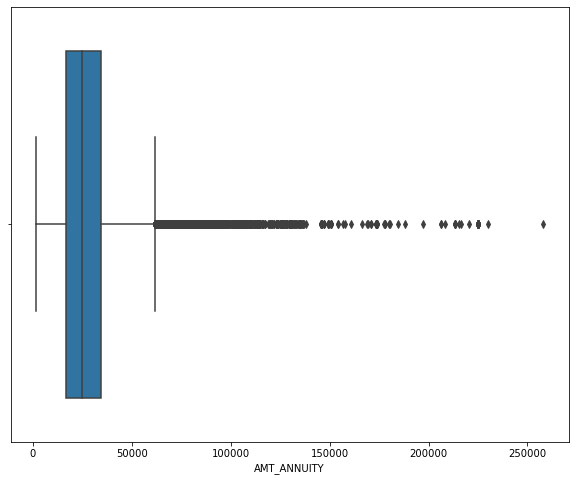

In [217]:
plt.figure(figsize=[10,8])
sns.boxplot(inp_app_data.AMT_ANNUITY)
plt.show()

In [218]:
inp_app_data.AMT_ANNUITY.quantile([0.99])

0.99    70006.5
Name: AMT_ANNUITY, dtype: float64

Difference between max annuity and 99th quantile is large and all these should be considered as outliers.
Median = 24903

**AMT_GOODS_PRICE**

In [219]:
inp_app_data.AMT_GOODS_PRICE.describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

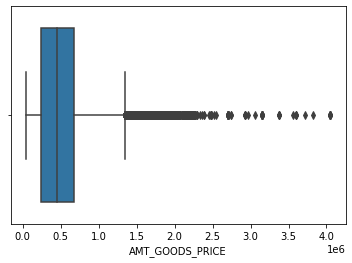

In [220]:
sns.boxplot(inp_app_data.AMT_GOODS_PRICE)
plt.show()

In [221]:
inp_app_data.AMT_GOODS_PRICE.median()

450000.0

**NAME_TYPE_SUITE**

In [222]:
inp_app_data.NAME_TYPE_SUITE.value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

Most of the people were unaccompanied

**CNT_FAM_MEMBERS**

In [223]:
inp_app_data.CNT_FAM_MEMBERS.value_counts()

2.0     158357
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
14.0         2
12.0         2
20.0         2
16.0         2
13.0         1
15.0         1
11.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

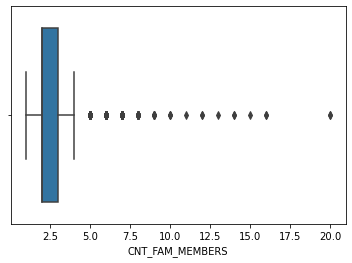

In [224]:
sns.boxplot(inp_app_data.CNT_FAM_MEMBERS)
plt.show()

Value greater than 5 can be considered as outliers.

**CNT_CHILDREN**

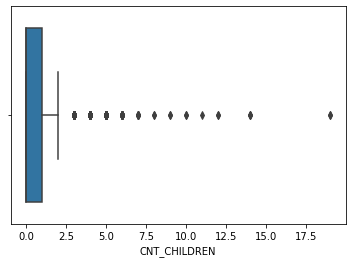

In [225]:
sns.boxplot(inp_app_data.CNT_CHILDREN)
plt.show()

**AMT_INCOME_TOTAL**

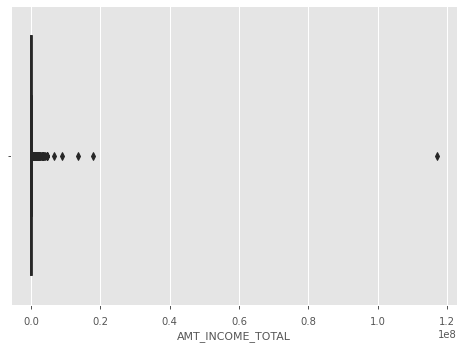

In [420]:
sns.boxplot(inp_app_data.AMT_INCOME_TOTAL)
plt.show()

In [227]:
quan1=inp_app_data['AMT_INCOME_TOTAL'].quantile(0.25)
quan2=inp_app_data['AMT_INCOME_TOTAL'].quantile(0.50)
quan3=inp_app_data['AMT_INCOME_TOTAL'].quantile(0.75)
max_q=inp_app_data['AMT_INCOME_TOTAL'].max()

#converting column for income bin to handle outliers
inp_app_data['AMT_INCOME_TOTAL_BIN'] = pd.cut(inp_app_data['AMT_INCOME_TOTAL'],[quan1, quan2, quan3,max_q ], labels = ['Low', 'Medium', 'High'])


In [228]:
inp_app_data['AMT_INCOME_TOTAL_BIN'].value_counts()

Medium    82213
High      71538
Low       53182
Name: AMT_INCOME_TOTAL_BIN, dtype: int64

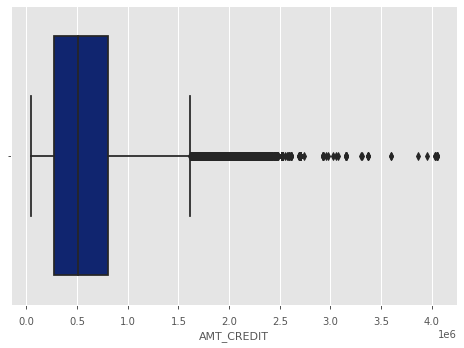

In [419]:
sns.boxplot(inp_app_data.AMT_CREDIT)
plt.show()

In [229]:
quan1=inp_app_data['AMT_CREDIT'].quantile(0.25)
quan2=inp_app_data['AMT_CREDIT'].quantile(0.50)
quan3=inp_app_data['AMT_CREDIT'].quantile(0.75)
max_q=inp_app_data['AMT_CREDIT'].max()

#converting column for income bin to handle outliers
inp_app_data['AMT_CREDIT_BIN'] = pd.cut(inp_app_data['AMT_CREDIT'],[quan1, quan2, quan3,max_q ], labels = ['Low', 'Medium', 'High'])


513531.0

In [168]:
inp_app_data['AMT_CREDIT_BIN'].value_counts()

Medium    77786
High      75876
Low       75428
Name: AMT_CREDIT_BIN, dtype: int64

## Univariate Analysis

### Analysis of categorical Values

In [230]:
inp_app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,AMT_INCOME_TOTAL_BIN,AMT_CREDIT_BIN
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,25,Medium,Low
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,45,High,High
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52,NaN,NaN
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,52,Low,Low
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,54,Low,Low


In [405]:
inp_app_data.TARGET.value_counts(normalize=True)

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

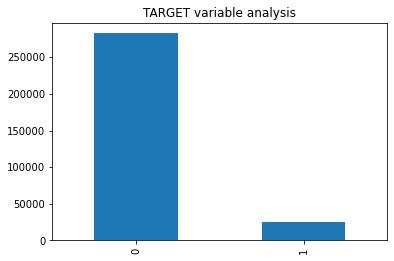

In [404]:
inp_app_data.TARGET.value_counts().plot.bar()
plt.title("TARGET variable analysis")
plt.show()

Number of defaulters are too low then others, So lets analyse it saperately

**NAME_INCOME_TYPE**

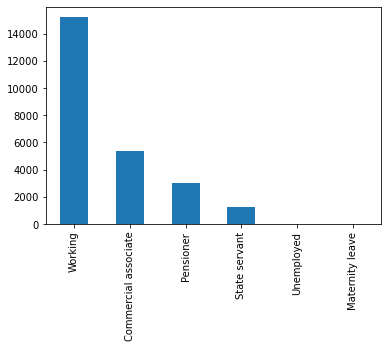

In [233]:
#value count for income type for defaulters
inp_app_data[inp_app_data.TARGET == 1].NAME_INCOME_TYPE.value_counts().plot.bar()
plt.show()

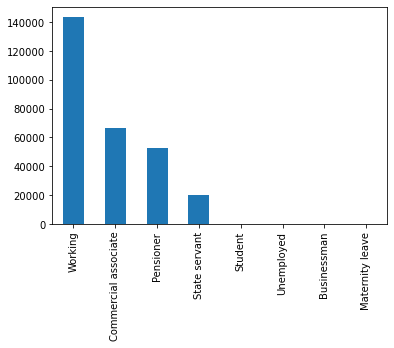

In [234]:
#value count for income type for defaulters
inp_app_data[inp_app_data.TARGET == 0].NAME_INCOME_TYPE.value_counts().plot.bar()
plt.show()

For both the case Working people have highest defaulters and non-defaulters

**NAME_EDUCATION_TYPE**

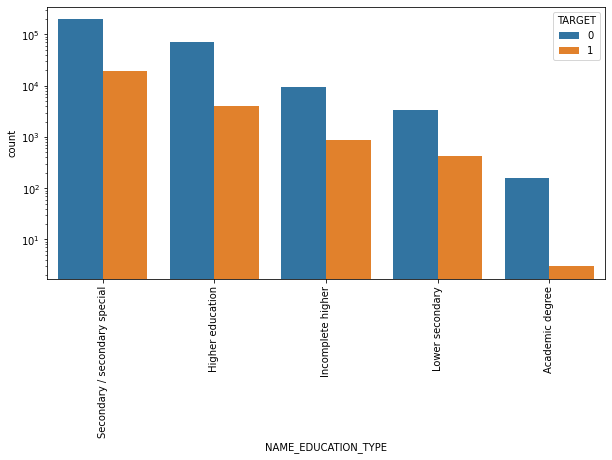

In [235]:
plt.figure(figsize=[10,5])
sns.countplot(x = 'NAME_EDUCATION_TYPE', hue='TARGET', data = inp_app_data)
plt.xticks(rotation = 90)
plt.yscale('log')
plt.show()


**NAME_FAMILY_STATUS**

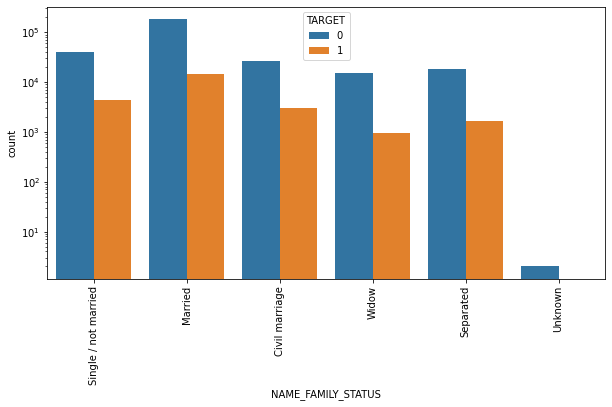

In [236]:
plt.figure(figsize=[10,5])
sns.countplot(x = 'NAME_FAMILY_STATUS', hue='TARGET', data = inp_app_data)
plt.xticks(rotation = 90)
plt.yscale('log')
plt.show()

**NAME_HOUSING_TYPE**


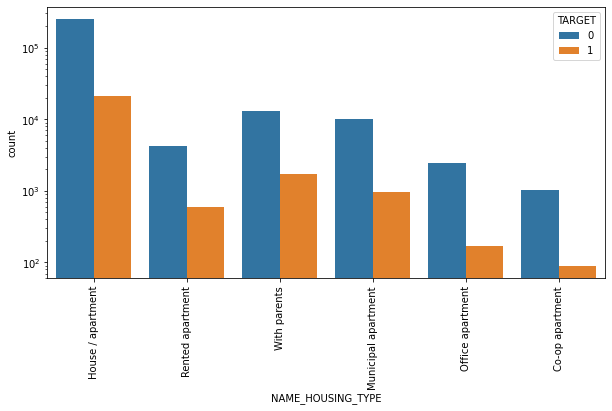

In [237]:
plt.figure(figsize=[10,5])
sns.countplot(x = 'NAME_HOUSING_TYPE', hue='TARGET', data = inp_app_data)
plt.xticks(rotation = 90)
plt.yscale('log')
plt.show()

**NAME_CONTRACT_TYPE**

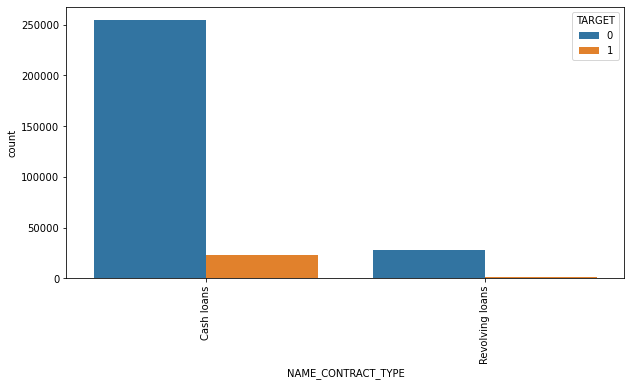

In [238]:
plt.figure(figsize=[10,5])
sns.countplot(x = 'NAME_CONTRACT_TYPE', hue='TARGET', data = inp_app_data)
plt.xticks(rotation = 90)
#plt.yscale('log')
plt.show()

**CODE_GENDER**

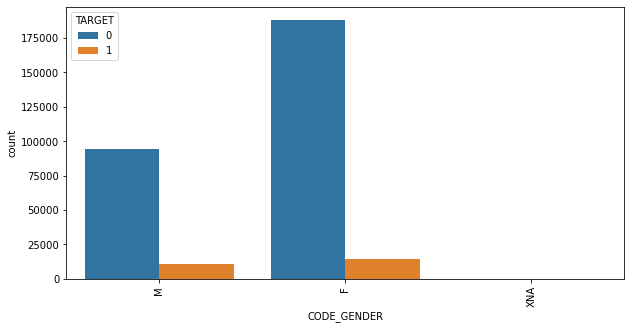

In [239]:
plt.figure(figsize=[10,5])
sns.countplot(x = 'CODE_GENDER', hue='TARGET', data = inp_app_data)
plt.xticks(rotation = 90)
#plt.yscale('log')
plt.show()

**FLAG_OWN_CAR**

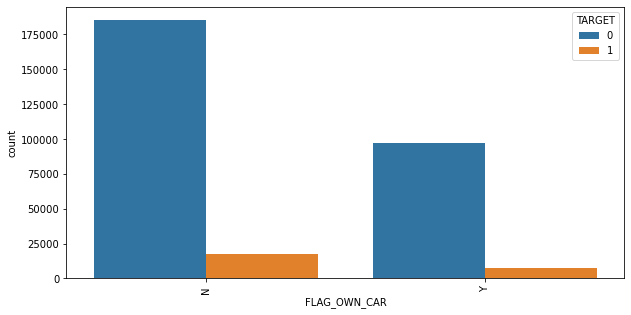

In [240]:
plt.figure(figsize=[10,5])
sns.countplot(x = 'FLAG_OWN_CAR', hue='TARGET', data = inp_app_data)
plt.xticks(rotation = 90)
#plt.yscale('log')
plt.show()

**FLAG_OWN_REALTY**

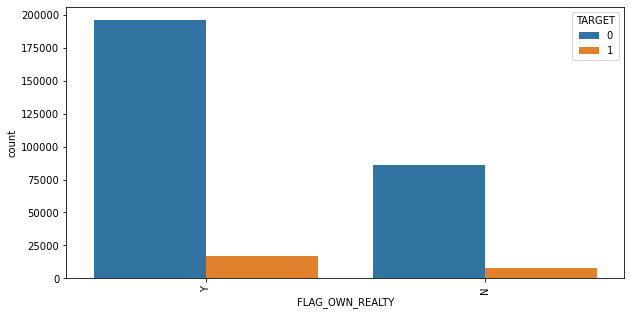

In [241]:
plt.figure(figsize=[10,5])
sns.countplot(x = 'FLAG_OWN_REALTY', hue='TARGET', data = inp_app_data)
plt.xticks(rotation = 90)
#plt.yscale('log')
plt.show()

**AMT_CREDIT_BIN**


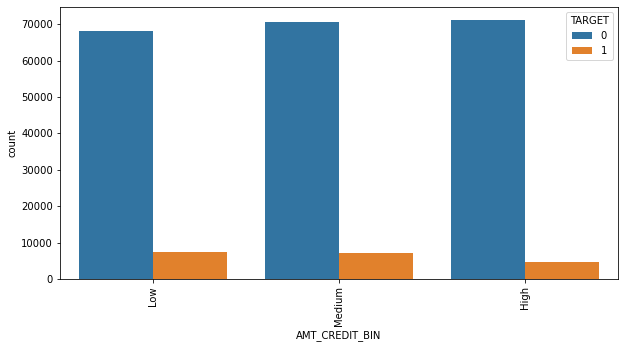

In [242]:
plt.figure(figsize=[10,5])
sns.countplot(x = 'AMT_CREDIT_BIN', hue='TARGET', data = inp_app_data)
plt.xticks(rotation = 90)
#plt.yscale('log')
plt.show()

**AMT_INCOME_TOTAL_BIN**

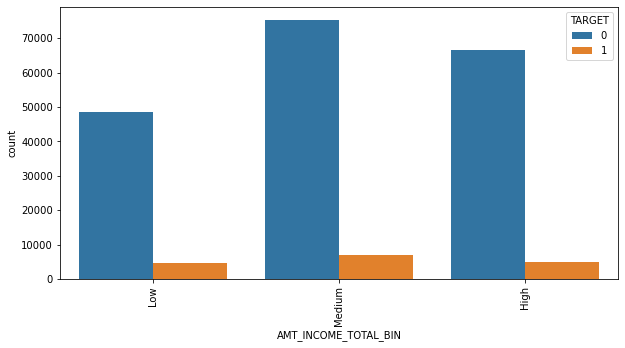

In [245]:
plt.figure(figsize=[10,5])
sns.countplot(x = 'AMT_INCOME_TOTAL_BIN', hue='TARGET', data = inp_app_data)
plt.xticks(rotation = 90)
#plt.yscale('log')
plt.show()

### Numerical data Analysis

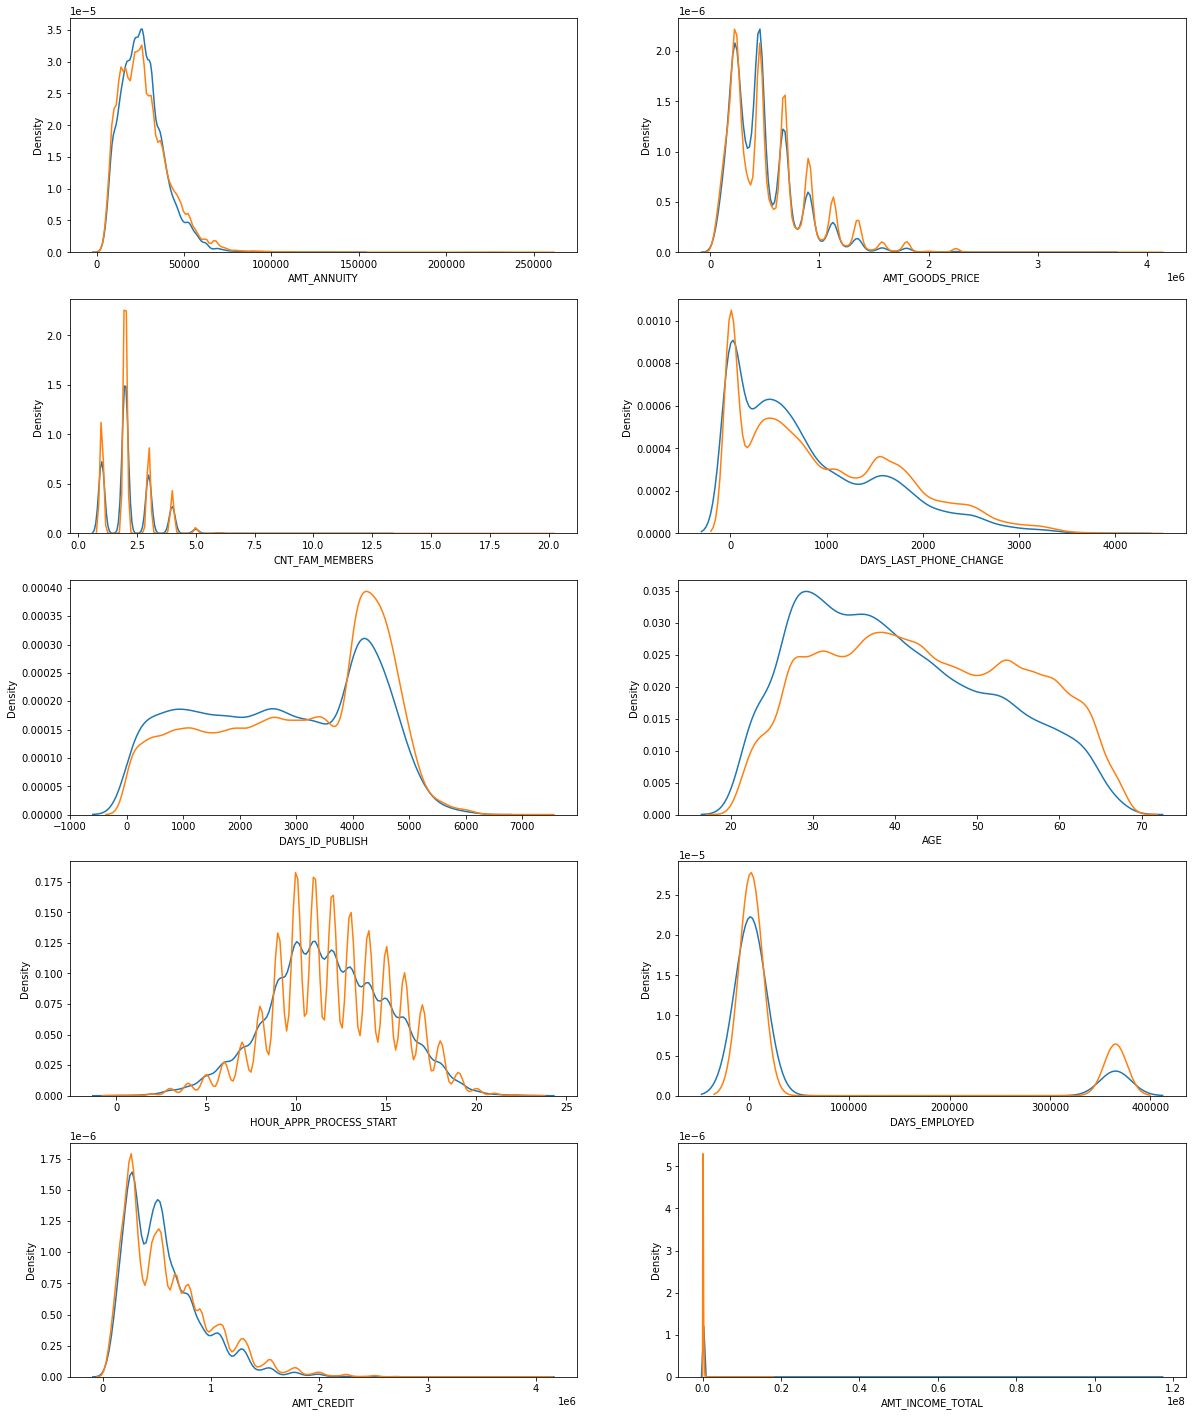

In [244]:
plt.figure(figsize = [20, 25])

plt.subplot(5,2,1)
sns.distplot(inp_app_data[inp_app_data.TARGET == 1].AMT_ANNUITY.dropna(), hist = False , label='Default')
sns.distplot(inp_app_data[inp_app_data.TARGET == 0].AMT_ANNUITY.dropna(), hist = False , label='Non-Default')

plt.subplot(5,2,2)
sns.distplot(inp_app_data[inp_app_data.TARGET == 1].AMT_GOODS_PRICE.dropna(), hist = False , label='Default')
sns.distplot(inp_app_data[inp_app_data.TARGET == 0].AMT_GOODS_PRICE.dropna(), hist = False , label='Non-Default')

plt.subplot(5,2,3)
sns.distplot(inp_app_data[inp_app_data.TARGET == 1].CNT_FAM_MEMBERS.dropna(), hist = False , label='Default')
sns.distplot(inp_app_data[inp_app_data.TARGET == 0].CNT_FAM_MEMBERS.dropna(), hist = False , label='Non-Default')

plt.subplot(5,2,4)
sns.distplot(inp_app_data[inp_app_data.TARGET == 1].DAYS_LAST_PHONE_CHANGE.dropna(), hist = False , label='Default')
sns.distplot(inp_app_data[inp_app_data.TARGET == 0].DAYS_LAST_PHONE_CHANGE.dropna(), hist = False , label='Non-Default')

plt.subplot(5,2,5)
sns.distplot(inp_app_data[inp_app_data.TARGET == 1].DAYS_ID_PUBLISH.dropna(), hist = False , label='Default')
sns.distplot(inp_app_data[inp_app_data.TARGET == 0].DAYS_ID_PUBLISH.dropna(), hist = False , label='Non-Default')

plt.subplot(5,2,6)
sns.distplot(inp_app_data[inp_app_data.TARGET == 1].AGE.dropna(), hist = False , label='Default')
sns.distplot(inp_app_data[inp_app_data.TARGET == 0].AGE.dropna(), hist = False , label='Non-Default')

plt.subplot(5,2,7)
sns.distplot(inp_app_data[inp_app_data.TARGET == 1].HOUR_APPR_PROCESS_START.dropna(), hist = False , label='Default')
sns.distplot(inp_app_data[inp_app_data.TARGET == 0].HOUR_APPR_PROCESS_START.dropna(), hist = False , label='Non-Default')

plt.subplot(5,2,8)
sns.distplot(inp_app_data[inp_app_data.TARGET == 1].DAYS_EMPLOYED.dropna(), hist = False , label='Default')
sns.distplot(inp_app_data[inp_app_data.TARGET == 0].DAYS_EMPLOYED.dropna(), hist = False , label='Non-Default')

plt.subplot(5,2,9)
sns.distplot(inp_app_data[inp_app_data.TARGET == 1].AMT_CREDIT.dropna(), hist = False , label='Default')
sns.distplot(inp_app_data[inp_app_data.TARGET == 0].AMT_CREDIT.dropna(), hist = False , label='Non-Default')

plt.subplot(5,2,10)
sns.distplot(inp_app_data[inp_app_data.TARGET == 1].AMT_INCOME_TOTAL.dropna(), hist = False , label='Default')
sns.distplot(inp_app_data[inp_app_data.TARGET == 0].AMT_INCOME_TOTAL.dropna(), hist = False , label='Non-Default')


plt.show()

### Conclusion for Univariate Analysis
- Secondary/special educated people apply loans in higher number. <br />
- Applicant with house or appartment tend to take more loans. <br />
- Applicant with higher Credit amount are less likely to default. <br />
- Applicant with Medium income are more likely to default. <br />
- Married people tend to take more Loan. <br />
- People with real estate tends to take more loans. <br />
- People who own a car tends to take lesser loans. <br />
- Number of Female applicant is more then male applicant. <br />
- Applicants tend to take more cash loans. <br />
- Default percentage of revolving loans is less. <br />
- Applicant with less income are more likely to default. <br />
- Applicant who recently got job are taking more loans.  <br />
- Retired applicants tend to take more loans. <br />
- Applicant with age between 27 - 41 years tend to take more loans,. <br />
- Small families tends to take more loans <br />
- People tend to take loans for less goods amount. <br />
- Lower amount annuity has higher number of loans <br />

## Bi-Variate Analysis

In [303]:
target1 = inp_app_data[inp_app_data.TARGET == 1]
target0 = inp_app_data[inp_app_data.TARGET == 0]


### For Target variable with respect to NAME_EDUCATION_TYPE, AMT_INCOME_TOTAL, NAME_FAMILY_STATUS

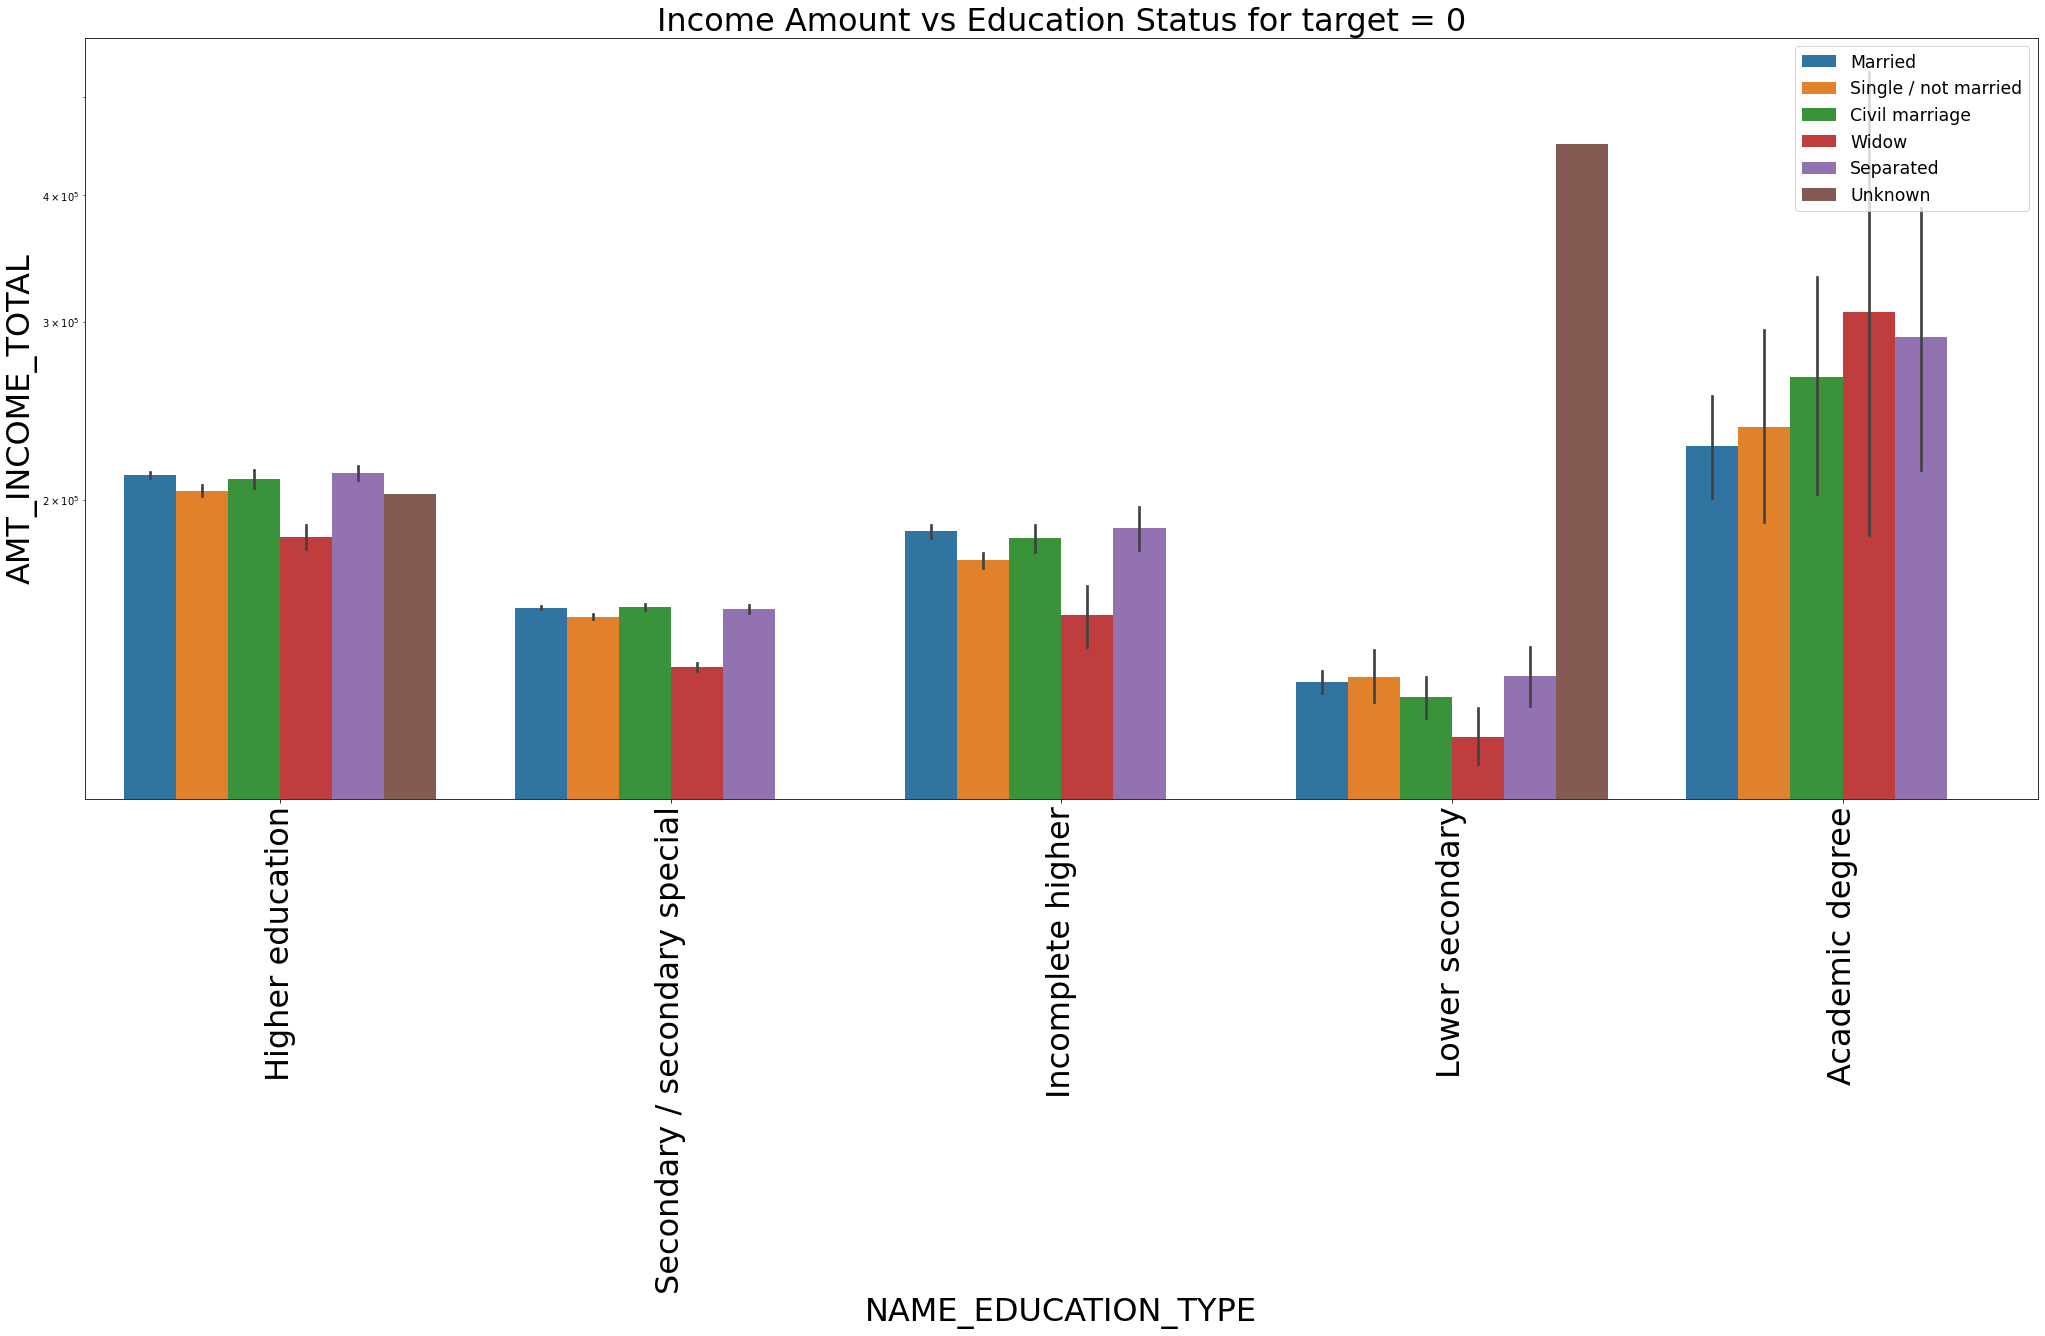

In [284]:
#for target == 0
plt.figure(figsize=(35,14)) 
plt.yscale('log')                     
plt.xticks(rotation = 90)
sns.barplot(data =target0, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS')
plt.legend( loc = 'upper right', fontsize = 'xx-large')                                              
plt.title('Income Amount vs Education Status for target = 0' , fontsize=32)
plt.xlabel("NAME_EDUCATION_TYPE", fontsize=32)
plt.ylabel("AMT_INCOME_TOTAL", fontsize=32)
plt.xticks(rotation=90, fontsize=32)
plt.yticks(rotation=360, fontsize=32)

plt.show()

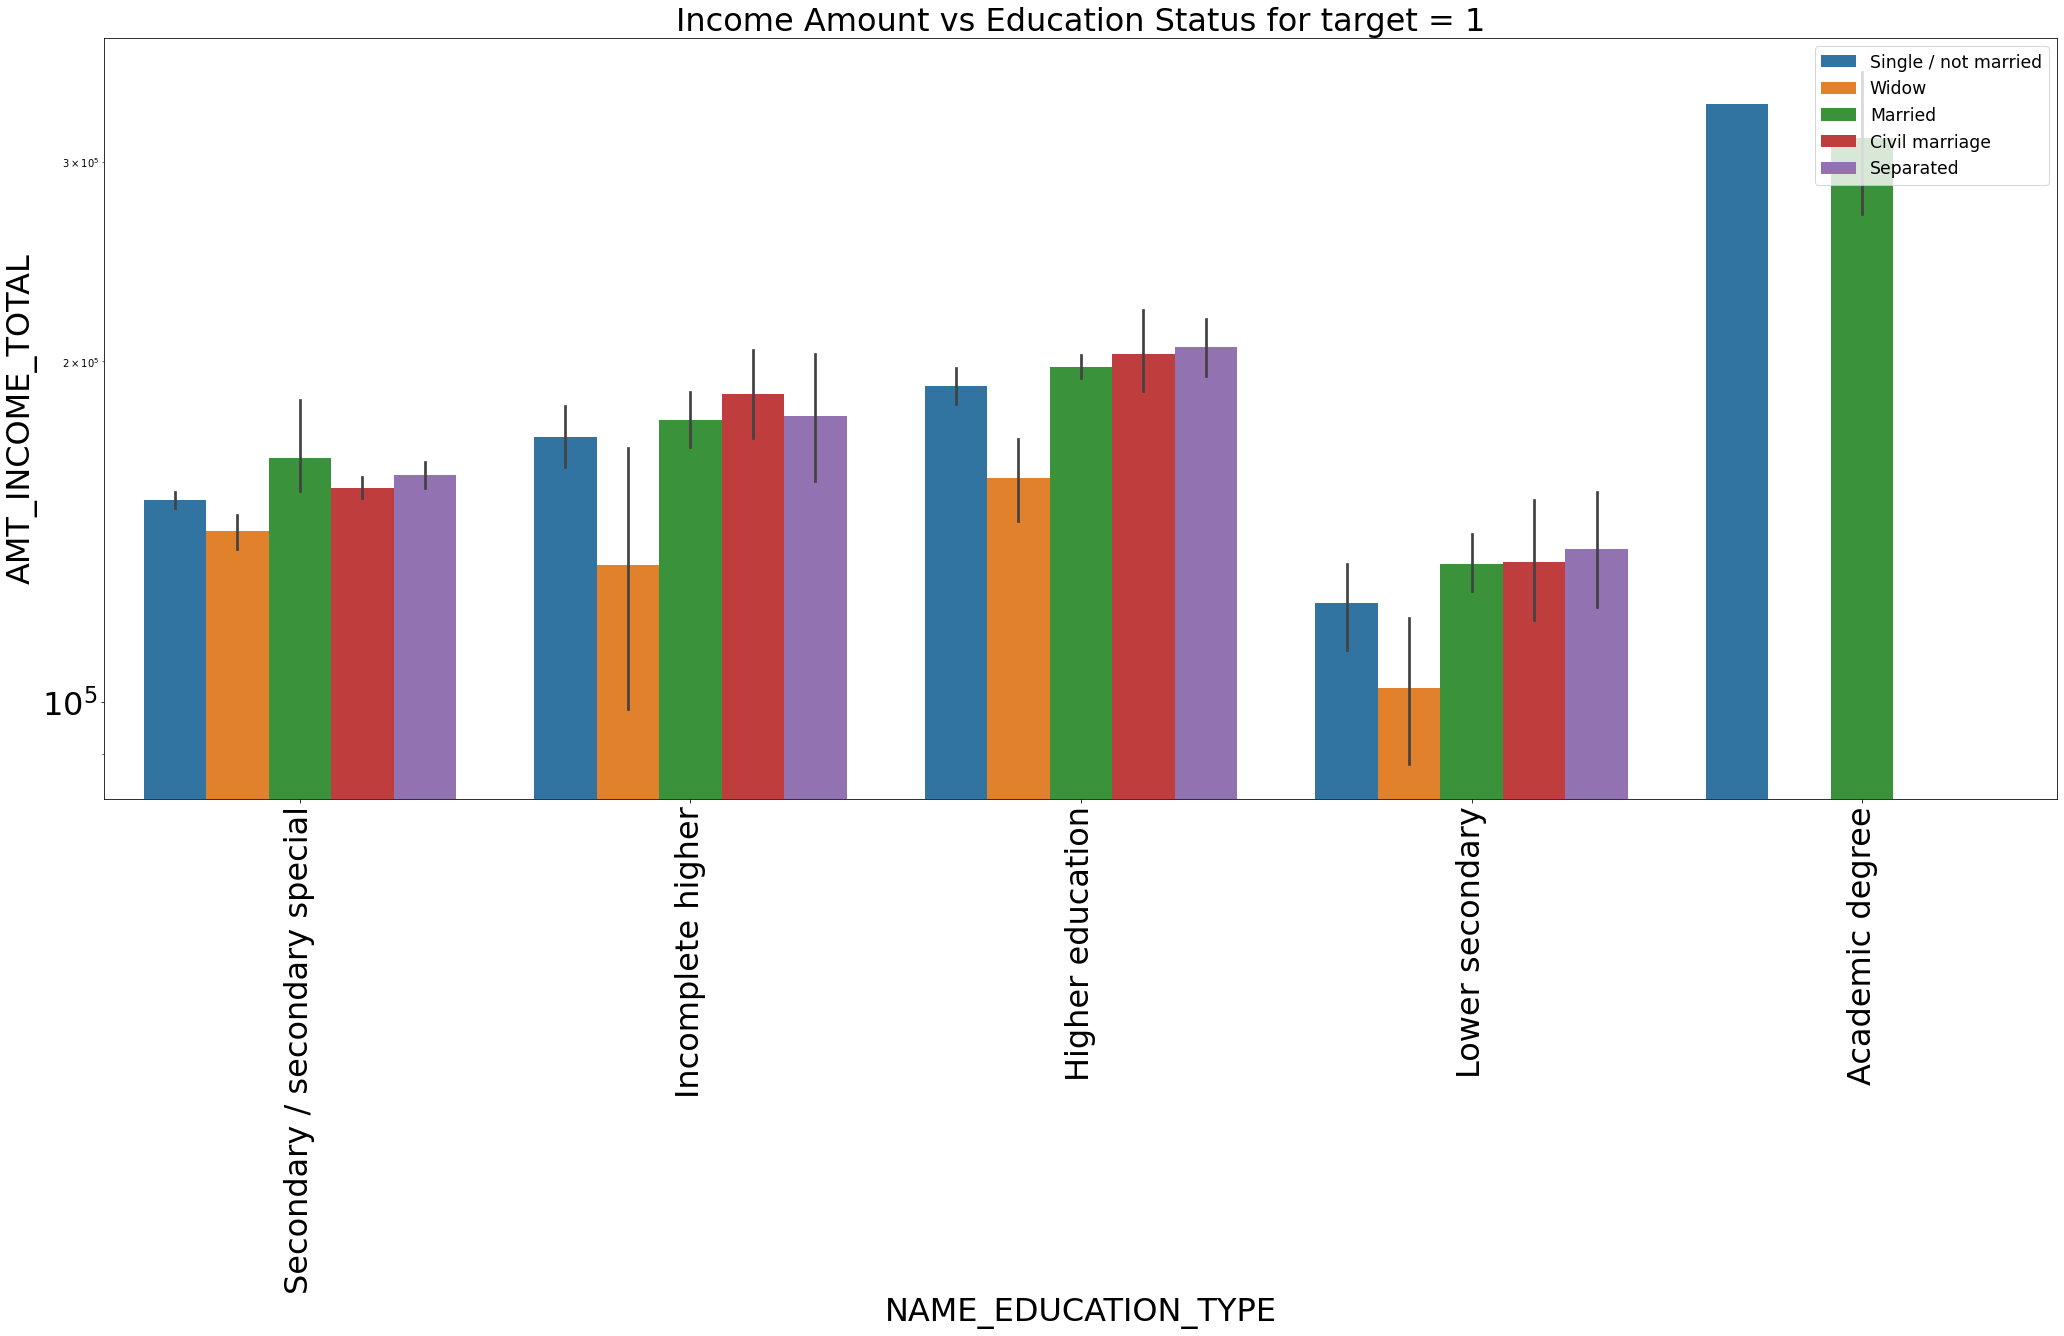

In [285]:
#for target == 1
plt.figure(figsize=(35,14)) 
plt.yscale('log')                     
plt.xticks(rotation = 90)
sns.barplot(data =target1, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS')
plt.legend( loc = 'upper right', fontsize = 'xx-large')                                              
plt.title('Income Amount vs Education Status for target = 1' , fontsize=32)
plt.xlabel("NAME_EDUCATION_TYPE", fontsize=32)
plt.ylabel("AMT_INCOME_TOTAL", fontsize=32)
plt.xticks(rotation=90, fontsize=32)
plt.yticks(rotation=360, fontsize=32)

plt.show()

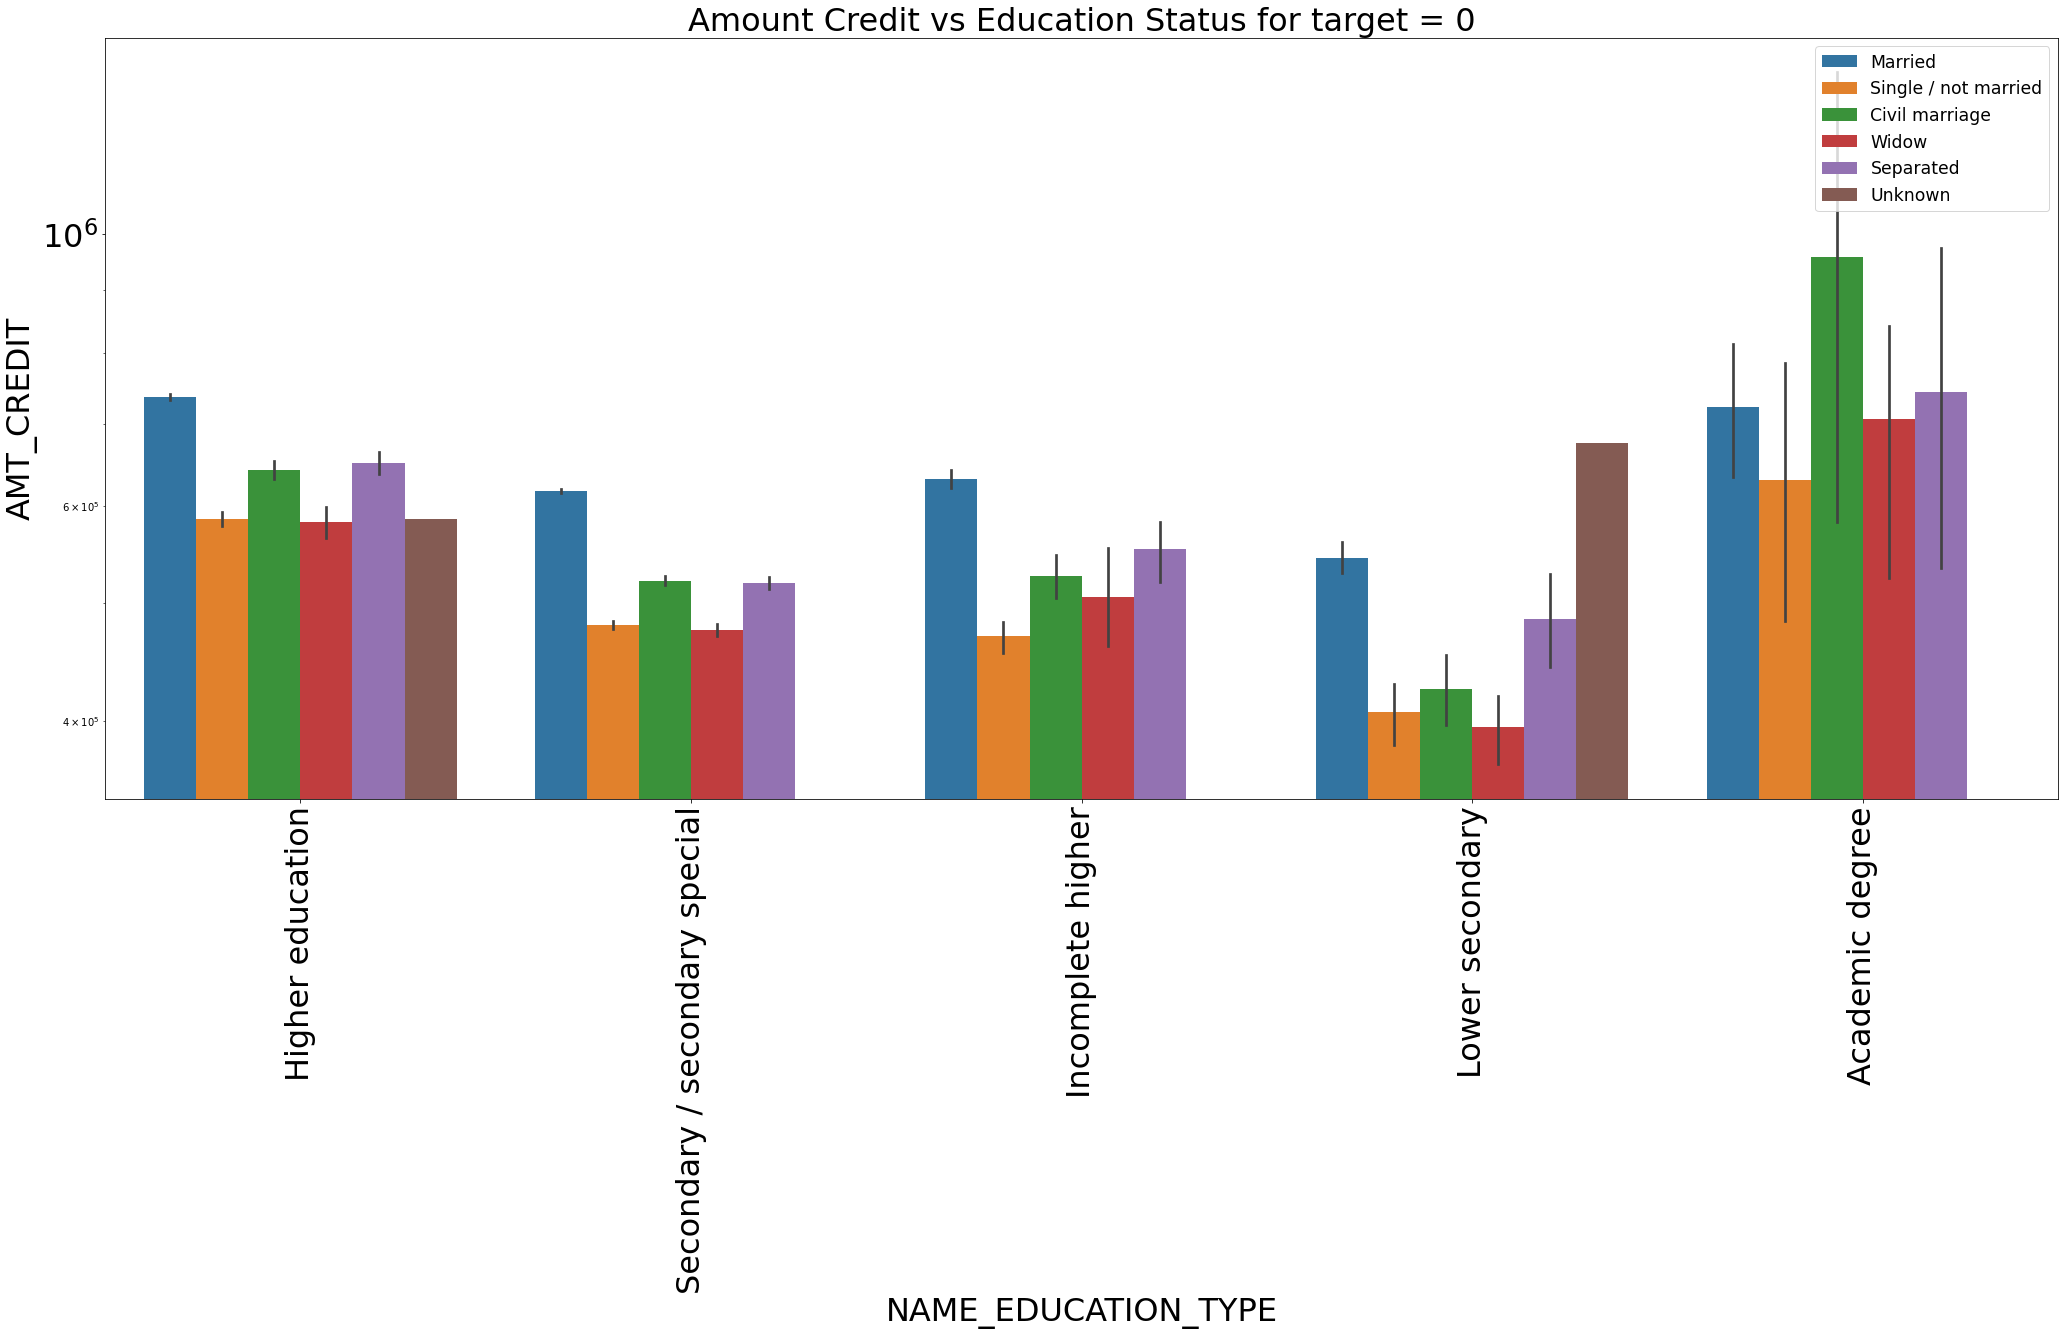

In [286]:
#for target == 0
plt.figure(figsize=(35,14)) 
plt.yscale('log')                     
plt.xticks(rotation = 90)
sns.barplot(data =target0, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS')
plt.legend( loc = 'upper right', fontsize = 'xx-large')                                              
plt.title('Amount Credit vs Education Status for target = 0' , fontsize=32)
plt.xlabel("NAME_EDUCATION_TYPE", fontsize=32)
plt.ylabel("AMT_CREDIT", fontsize=32)
plt.xticks(rotation=90, fontsize=32)
plt.yticks(rotation=360, fontsize=32)

plt.show()

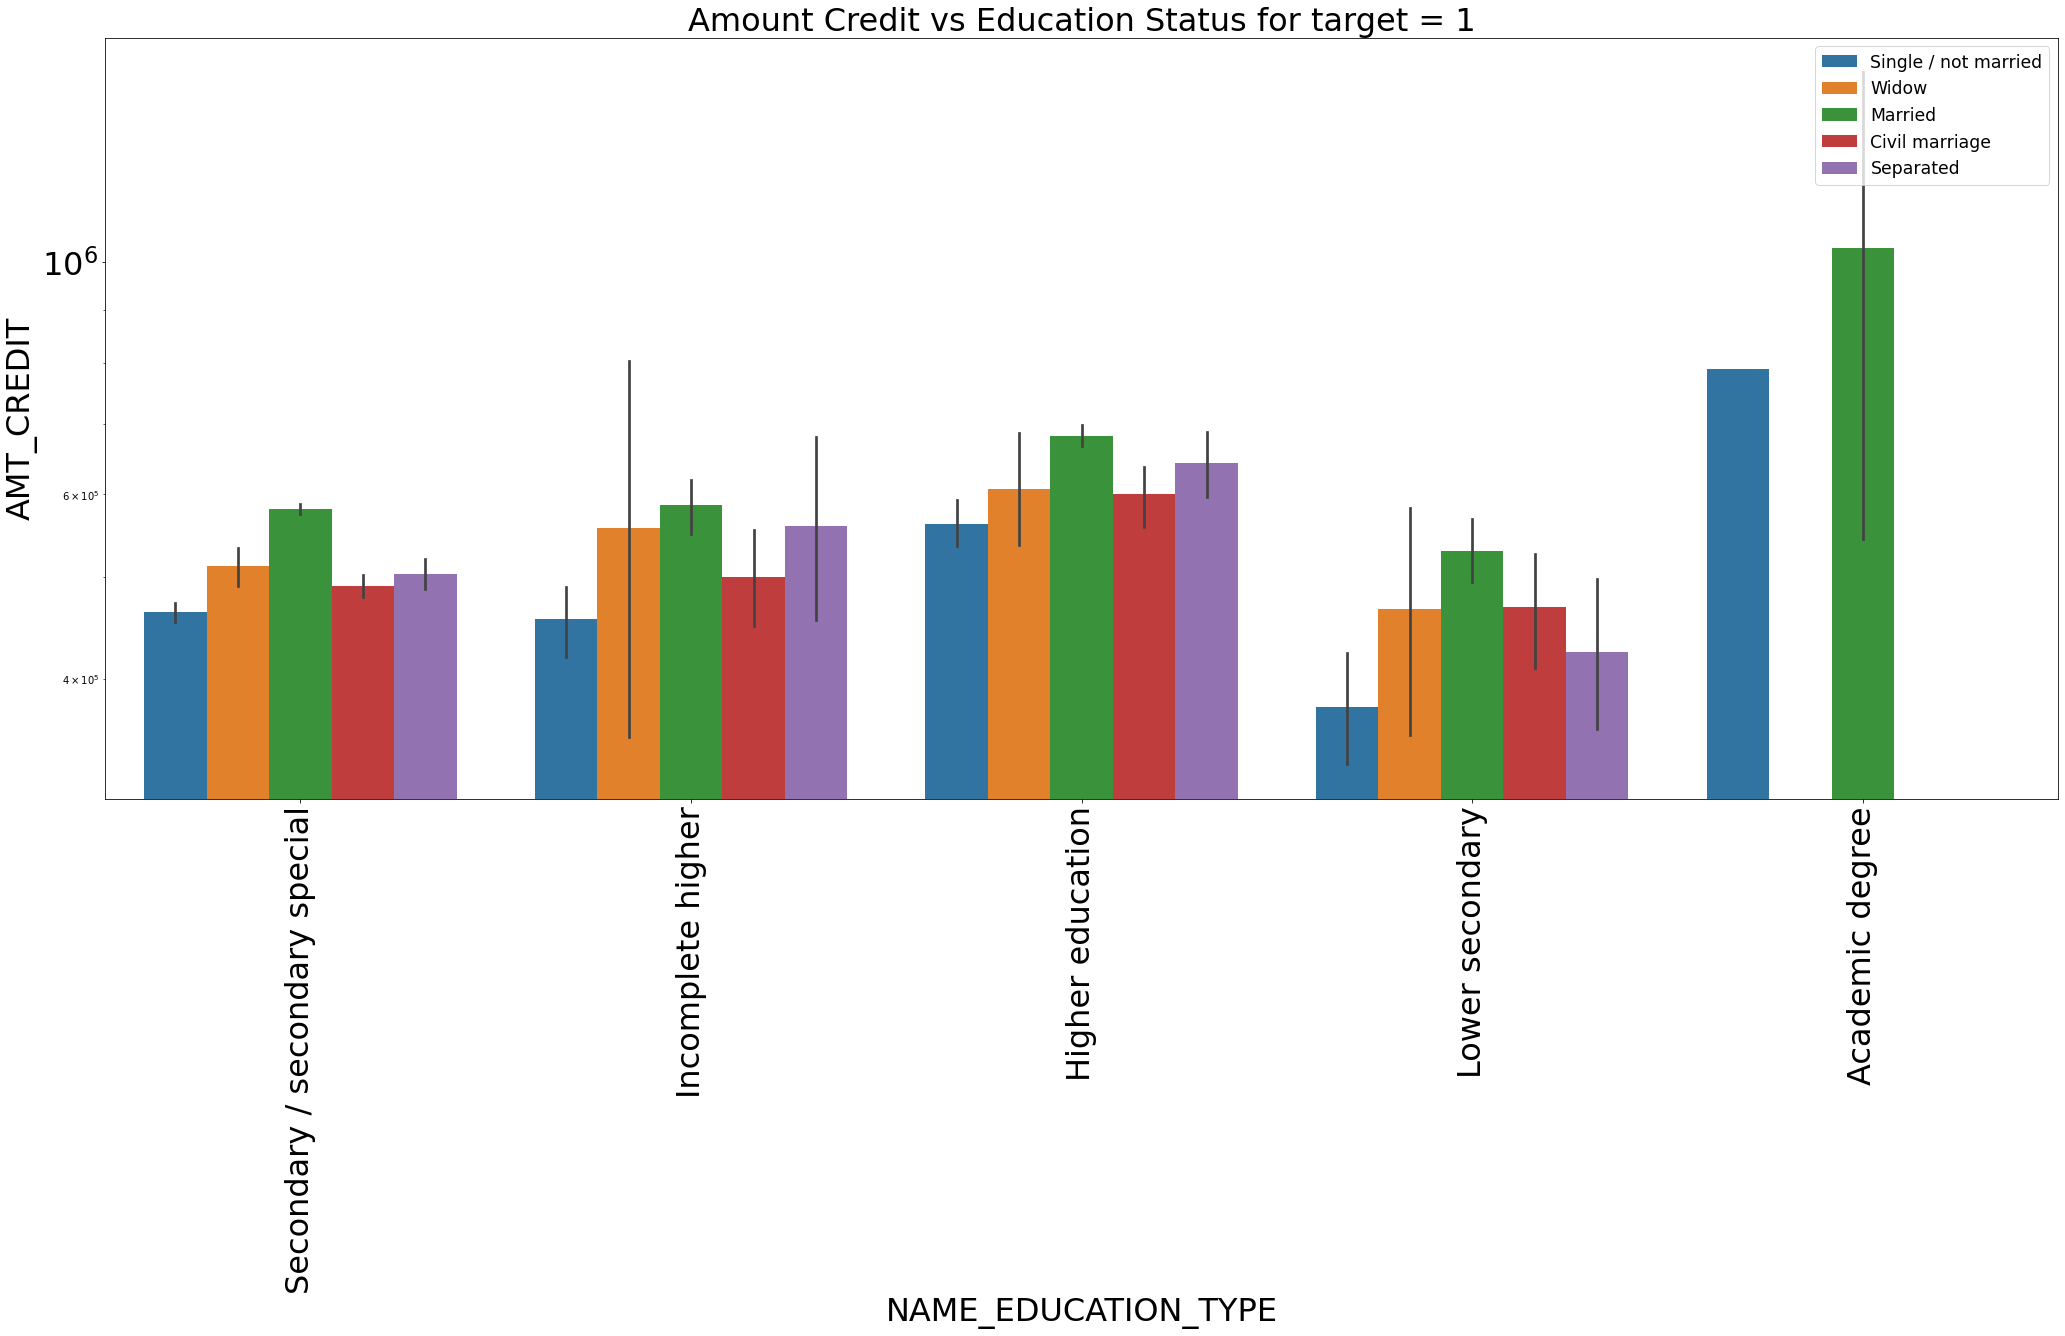

In [287]:
#for target == 1
plt.figure(figsize=(35,14)) 
plt.yscale('log')                     
plt.xticks(rotation = 90)
sns.barplot(data =target1, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS')
plt.legend( loc = 'upper right', fontsize = 'xx-large')                                              
plt.title('Amount Credit vs Education Status for target = 1' , fontsize=32)
plt.xlabel("NAME_EDUCATION_TYPE", fontsize=32)
plt.ylabel("AMT_CREDIT", fontsize=32)
plt.xticks(rotation=90, fontsize=32)
plt.yticks(rotation=360, fontsize=32)

plt.show()

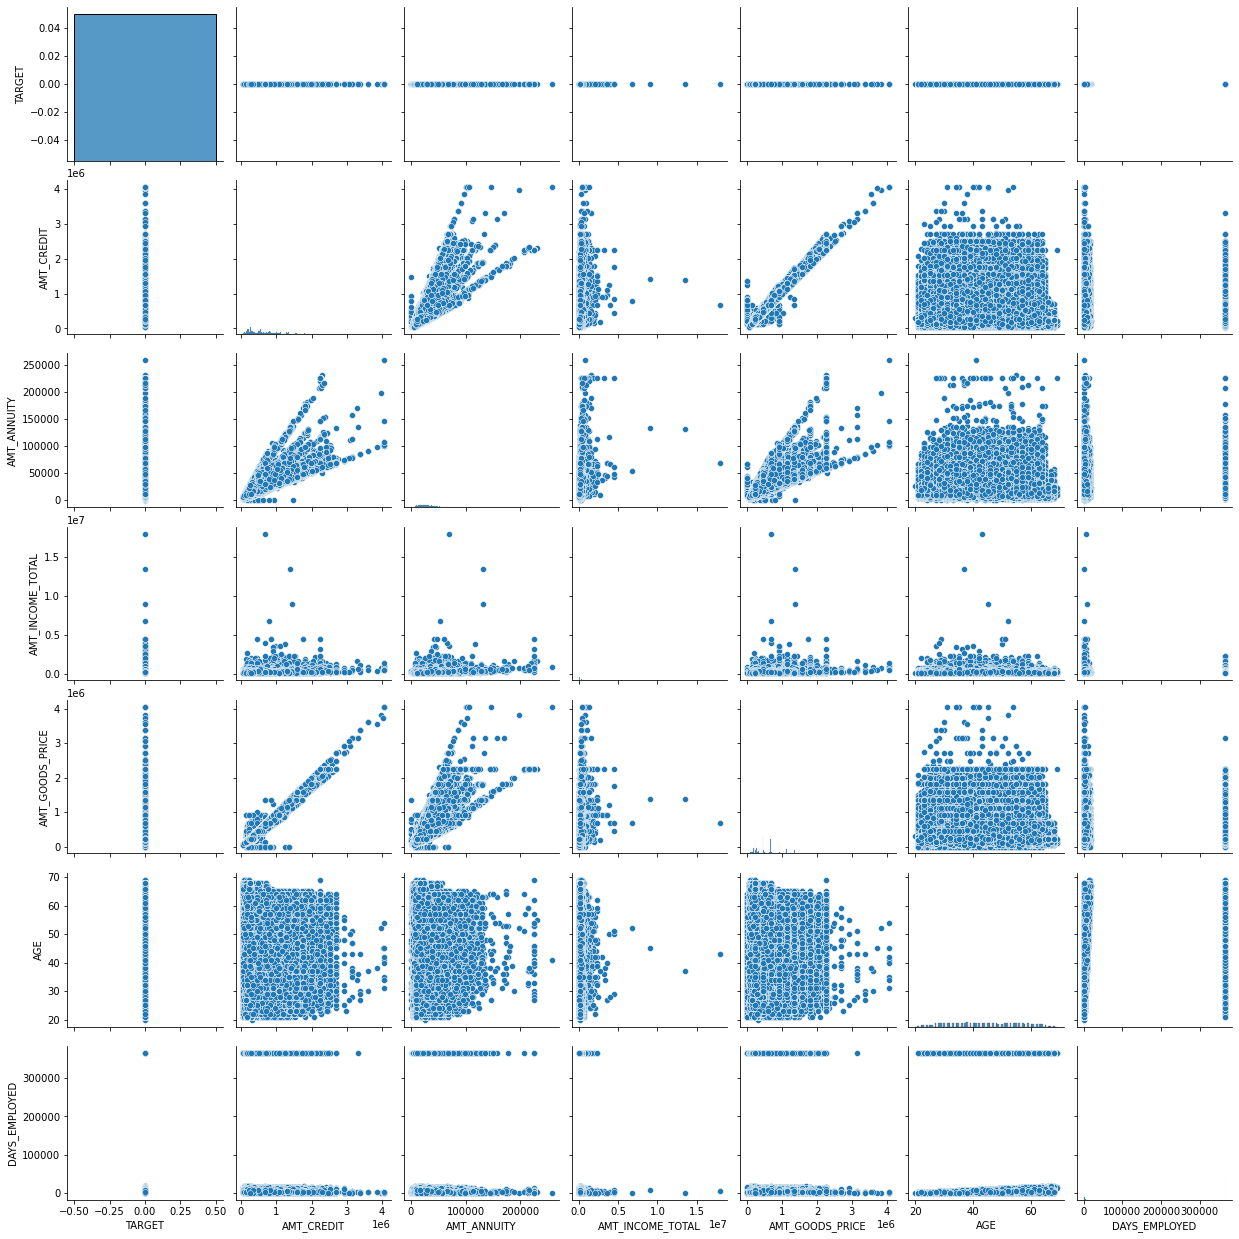

In [270]:
# pair plots for target == 0
sub_df = target0[['TARGET','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'AGE','DAYS_EMPLOYED']].fillna(0)
sns.pairplot(sub_df)
plt.show()


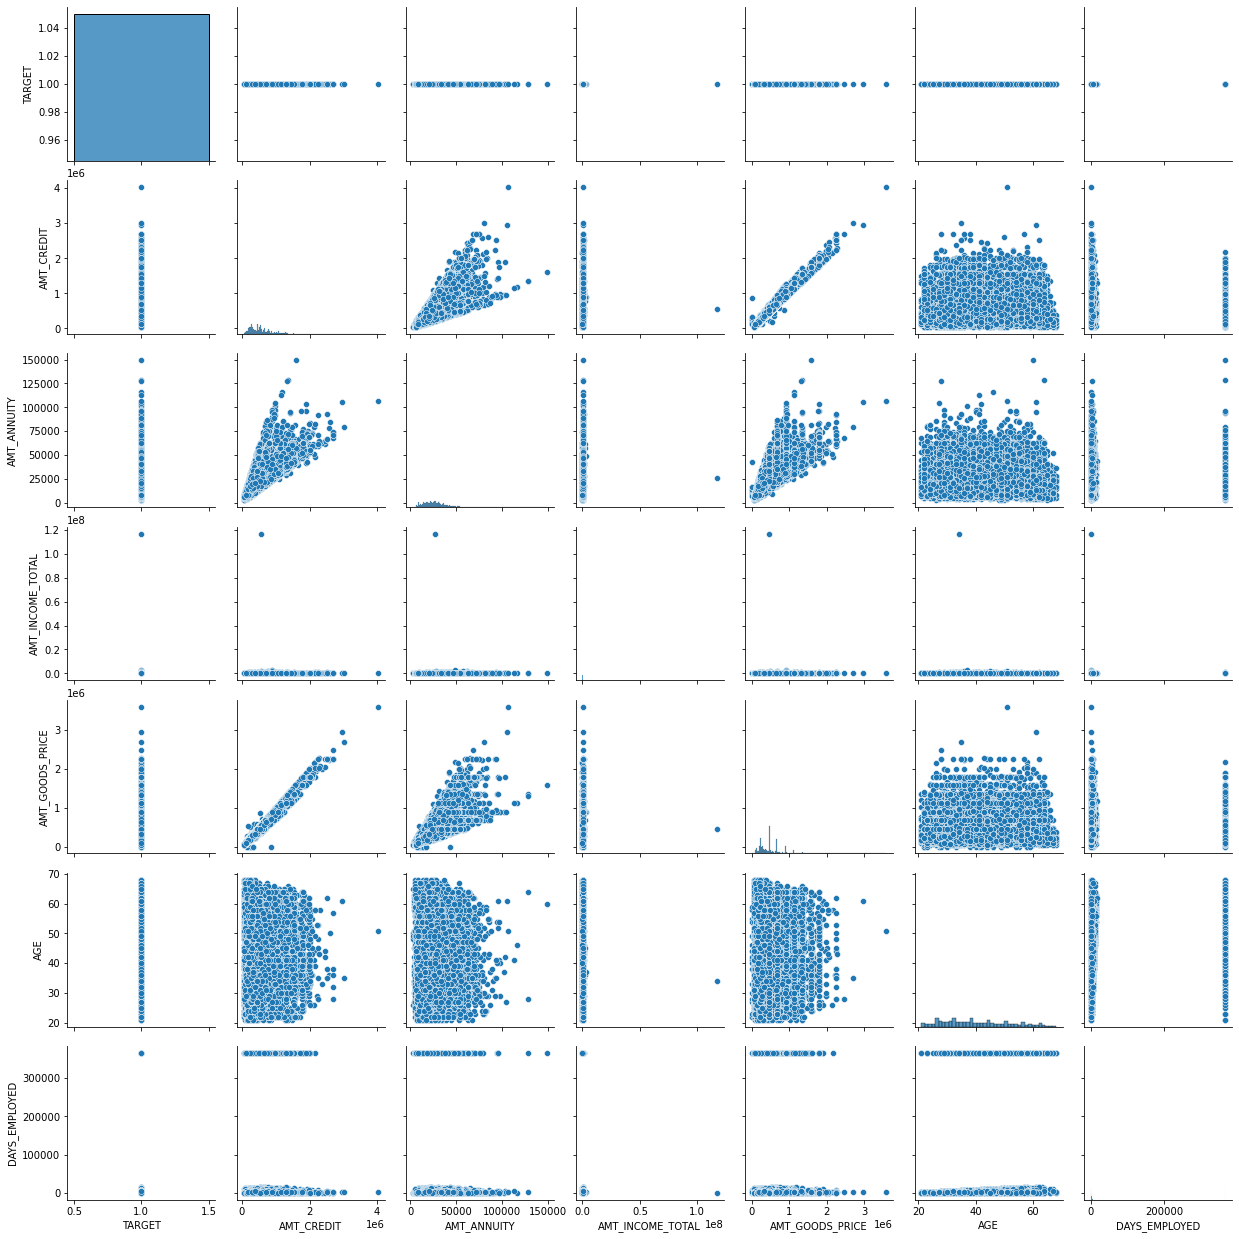

In [271]:
# pair plots for target == 1
sub_df = target1[['TARGET','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'AGE','DAYS_EMPLOYED']].fillna(0)
sns.pairplot(sub_df)
plt.show()


### Insights
- People with Acedemic degree apart has taken more loans then other and have repayed it.
- People with higher education, for all the family status have payed the loans
- Except for Single and Married people, non of the people who have academic degree have defaulted.
- In lower secondary educated section, widow people have defaulted the least
- Married people with academic degree have taken higher amount of loans and defaulted more.
- married people in all education categories have taken more amount of loans and defauted.
- widows in all education categories have defaulted lesser times.
- As the goods price increases, loan amount also increases.
- AMT_credit is also in positive correlation with AMT_Annuity.


## Heatmap

In [307]:
target0.loc[:,'CNT_CHILDREN':'LIVE_CITY_NOT_WORK_CITY'].corr()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY
CNT_CHILDREN,1.000000,0.027397,0.003081,0.020905,-0.000525,-0.024363,-0.336966,-0.245174,-0.185792,0.028751,0.001080,0.244274,0.055453,-0.001201,-0.029929,0.023460,0.878571,0.022842,0.021866,-0.005244,-0.012342,0.010857,0.017326,0.021587,0.072193,0.070988
AMT_INCOME_TOTAL,0.027397,1.000000,0.342799,0.418953,0.349462,0.167851,-0.062609,-0.140392,-0.064937,-0.022896,0.000733,0.140744,-0.032404,-0.018814,0.002683,0.083705,0.034256,-0.186573,-0.200466,0.076743,0.068510,0.137174,0.127701,0.010567,0.017618,0.020684
AMT_CREDIT,0.003081,0.342799,1.000000,0.771309,0.987250,0.100604,0.047378,-0.070104,-0.013477,0.001464,0.001498,0.071257,-0.017119,0.023096,0.026725,0.017074,0.064536,-0.103337,-0.112238,0.053619,0.024617,0.053735,0.054250,-0.025036,-0.015703,0.002506
AMT_ANNUITY,0.020905,0.418953,0.771309,1.000000,0.776686,0.120988,-0.012263,-0.104978,-0.039436,-0.014113,0.000161,0.105645,-0.022467,0.021397,0.012231,0.071270,0.075787,-0.132128,-0.145153,0.053589,0.041992,0.080665,0.075487,-0.005675,0.001520,0.010582
AMT_GOODS_PRICE,-0.000525,0.349462,0.987250,0.776686,1.000000,0.103827,0.044565,-0.068609,-0.015916,0.003649,0.001464,0.069769,0.005043,0.020185,0.042255,0.017249,0.062814,-0.104382,-0.112601,0.062766,0.026731,0.054922,0.054414,-0.024878,-0.016744,0.001310
REGION_POPULATION_RELATIVE,-0.024363,0.167851,0.100604,0.120988,0.103827,1.000000,0.025244,-0.007198,0.052083,0.001071,0.001396,0.007094,-0.014340,-0.013103,0.091484,0.040822,-0.023425,-0.539005,-0.537301,0.172814,0.004306,0.060086,0.083965,-0.048217,-0.041516,-0.013502
DAYS_BIRTH,-0.336966,-0.062609,0.047378,-0.012263,0.044565,0.025244,1.000000,0.626114,0.333151,0.271314,0.003260,-0.622073,-0.172290,0.015328,0.041835,-0.090793,-0.285825,-0.002332,-0.000780,-0.095916,-0.066252,-0.097908,-0.071648,-0.179772,-0.241904,-0.160072
DAYS_EMPLOYED,-0.245174,-0.140392,-0.070104,-0.104978,-0.068609,-0.007198,0.626114,1.000000,0.214511,0.276663,0.000926,-0.999756,-0.235247,0.013137,0.015782,-0.064850,-0.238301,0.038328,0.040461,-0.095455,-0.037502,-0.111011,-0.098920,-0.092842,-0.258121,-0.221387
DAYS_REGISTRATION,-0.185792,-0.064937,-0.013477,-0.039436,-0.015916,0.052083,0.333151,0.214511,1.000000,0.100236,0.000128,-0.212297,-0.057875,0.004408,0.075104,-0.035468,-0.175630,-0.075846,-0.069357,0.008044,-0.028700,-0.037870,-0.028475,-0.064216,-0.098919,-0.072248
DAYS_ID_PUBLISH,0.028751,-0.022896,0.001464,-0.014113,0.003649,0.001071,0.271314,0.276663,0.100236,1.000000,0.002425,-0.275468,-0.046546,0.001507,0.036247,-0.027576,0.020460,0.008998,0.011734,-0.033980,-0.034692,-0.049161,-0.035069,-0.075096,-0.099628,-0.062259


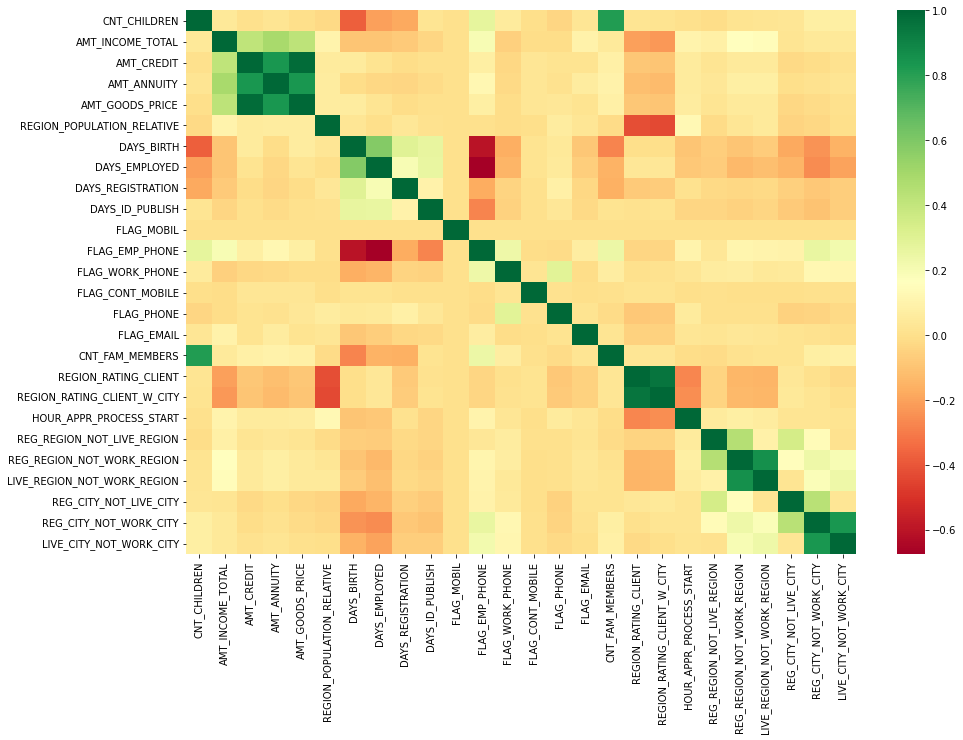

In [321]:
plt.figure(figsize=[15,10])
sns.axes_style('white')
sns.heatmap(target0.loc[:,'CNT_CHILDREN':'LIVE_CITY_NOT_WORK_CITY'].corr(method='spearman'), cmap='RdYlGn',)
plt.show()

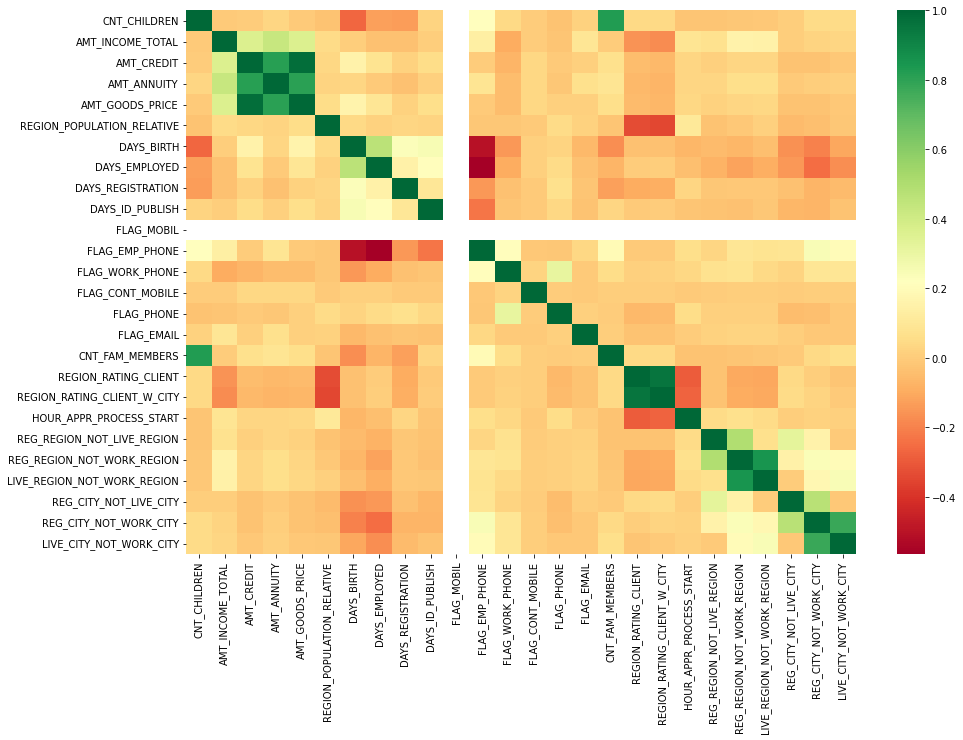

In [319]:
plt.figure(figsize=[15,10])
sns.axes_style('white')
sns.heatmap(target1.loc[:,'CNT_CHILDREN':'LIVE_CITY_NOT_WORK_CITY'].corr(method='spearman'), cmap='RdYlGn')
plt.show()

### Insights
- AMT_credit is correlated to income, annuity and good price.
- both for target 1 and 0, correlation are alomost same.




## Read , Merge, clean and analyse previous_application.csv



In [338]:
# read
inp_pre_data  = pd.read_csv("previous_application.csv")
inp_pre_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [334]:
inp_pre_data.shape

(1670214, 37)

In [339]:
final = pd.merge(inp_app_data, inp_pre_data, how='left', on='SK_ID_CURR')
final.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,AMT_INCOME_TOTAL_BIN,AMT_CREDIT_BIN,AGE_GROUP,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_y,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0,25,Medium,Low,Teenager,1038818.0,Consumer loans,9251.775,179055.0,179055.0,0.0,179055.0,SATURDAY,9.0,Y,1.0,0.000000,NaN,NaN,XAP,Approved,-606.0,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500.0,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,45,High,High,Middle_Age,1810518.0,Cash loans,98356.995,900000.0,1035882.0,NaN,900000.0,FRIDAY,12.0,Y,1.0,NaN,NaN,NaN,XNA,Approved,-746.0,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1.0,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,45,High,High,Middle_Age,2636178.0,Consumer loans,64567.665,337500.0,348637.5,0.0,337500.0,SUNDAY,17.0,Y,1.0,0.000000,NaN,NaN,XAP,Approved,-828.0,Cash through the bank,XAP,Family,Refreshed,Furniture,POS,XNA,Stone,1400.0,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,45,High,High,Middle_Age,2396755.0,Consumer loans,6737.310,68809.5,68053.5,6885.0,68809.5,SATURDAY,15.0,Y,1.0,0.100061,NaN,NaN,XAP,Approved,-2341.0,Cash through the bank,XAP

In [340]:
#Null percentage
(final.isnull().sum()/len(final))*100

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE_x             0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT_x                     0.000000
AMT_ANNUITY_x                    0.006503
AMT_GOODS_PRICE_x                0.085236
NAME_TYPE_SUITE_x                0.000000
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0.000000
FLAG_WORK_PHONE                  0

In [341]:
final = final.loc[:, 100*final.isnull().sum()/len(final) < 50]

In [342]:
final.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,SK_ID_PREV,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,HOUR_APPR_PROCESS_START_y,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430062e+06,1.428936e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430153e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.413701e+06,1.106483e+06,1.413701e+06,1.413700e+06,1.094176e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.106488e+06,852595.000000,852595.000000,852595.000000,852595.000000,852595.000000,852595.000000
mean,2.784702e+05,8.624240e-02,4.038870e-01,1.736036e+05,5.893386e+05,2.704203e+04,5.294435e+05,2.079102e-02,1.631495e+04,7.255951e+04,5.001275e+03,3.034492e+03,9.999993e-01,8.067175e-01,1.824732e-01,9.989917e-01,2.825792e-01,7.195793e-02,2.149006e+00,2.058179e+00,2.036176e+00,1.199401e+01,1.229377e-02,4.435953e-02,3.626041e-02,7.368082e-02,2.220151e-01,1.738609e-01,5.118497e-01,4.978161e-01,1.538150e+00,1.532512e-01,1.520324e+00,1.074548e-01,1.076470e+03,5.503599e-03,6.080460e-03,3.384039e-02,2.652251e-01,3.169475e-01,2.548950e+00,4.419713e+01,1.922744e+06,1.583718e+04,1.752436e+05,1.963541e+05,2.264512e+05,1.247893e+01,9.964321e-01,-8.803670e+02,3.149878e+02,1.605194e+01,342257.656710,13488.741567,33274.831806,76665.634755,82353.171672,0.330572
std,1.028021e+05,2.807218e-01,7.165176e-01,1.983303e+05,3.874204e+05,1.404002e+04,3.557882e+05,1.339810e-02,4.346737e+03,1.432601e+05,3.551626e+03,1.507182e+03,8.361967e-04,3.948728e-01,3.862342e-01,3.173746e-02,4.502536e-01,2.584183e-01,9.001579e-01,4.963435e-01,4.891555e-01,3.233163e+00,1.101937e-01,2.058927e-01,1.869375e-01,2.612509e-01,4.156014e-01,3.789899e-01,1.909532e-01,1.796804e-01,2.525672e+00,4.646596e-01,2.503920e+00,3.780070e-01,8.036990e+02,7.720087e-02,1.012908e-01,2.009888e-01,9.254467e-01,8.745520e-01,2.270532e+00,1.190810e+01,5.327153e+05,1.472491e+04,2.936222e+05,3.194813e+05,3.159376e+05,3.331474e+00,5.962560e-02,7.835402e+02,7.695082e+03,1.456675e+01,88832.266598,71650.147146,106161.775933,149704.716371,153537.064274,0.470419
min,1.000020e+05,0.000000e+00,0.000000e+00,2.565000e+04,4.500000e+04,1.615500e+03,4.050000e+04,2.900000e-04,7.489000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.173617e-08,5.272652e-04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,1.000001e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000

### Univariate analyisis with NAME_CONTRACT_STATUS

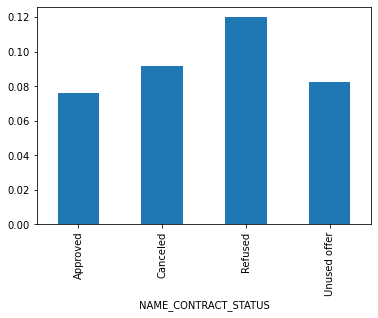

In [356]:
final.groupby("NAME_CONTRACT_STATUS")["TARGET"].mean().plot.bar()
plt.show()

More people who are now facing difficulties paying loans are those for whom loans were previously refused.

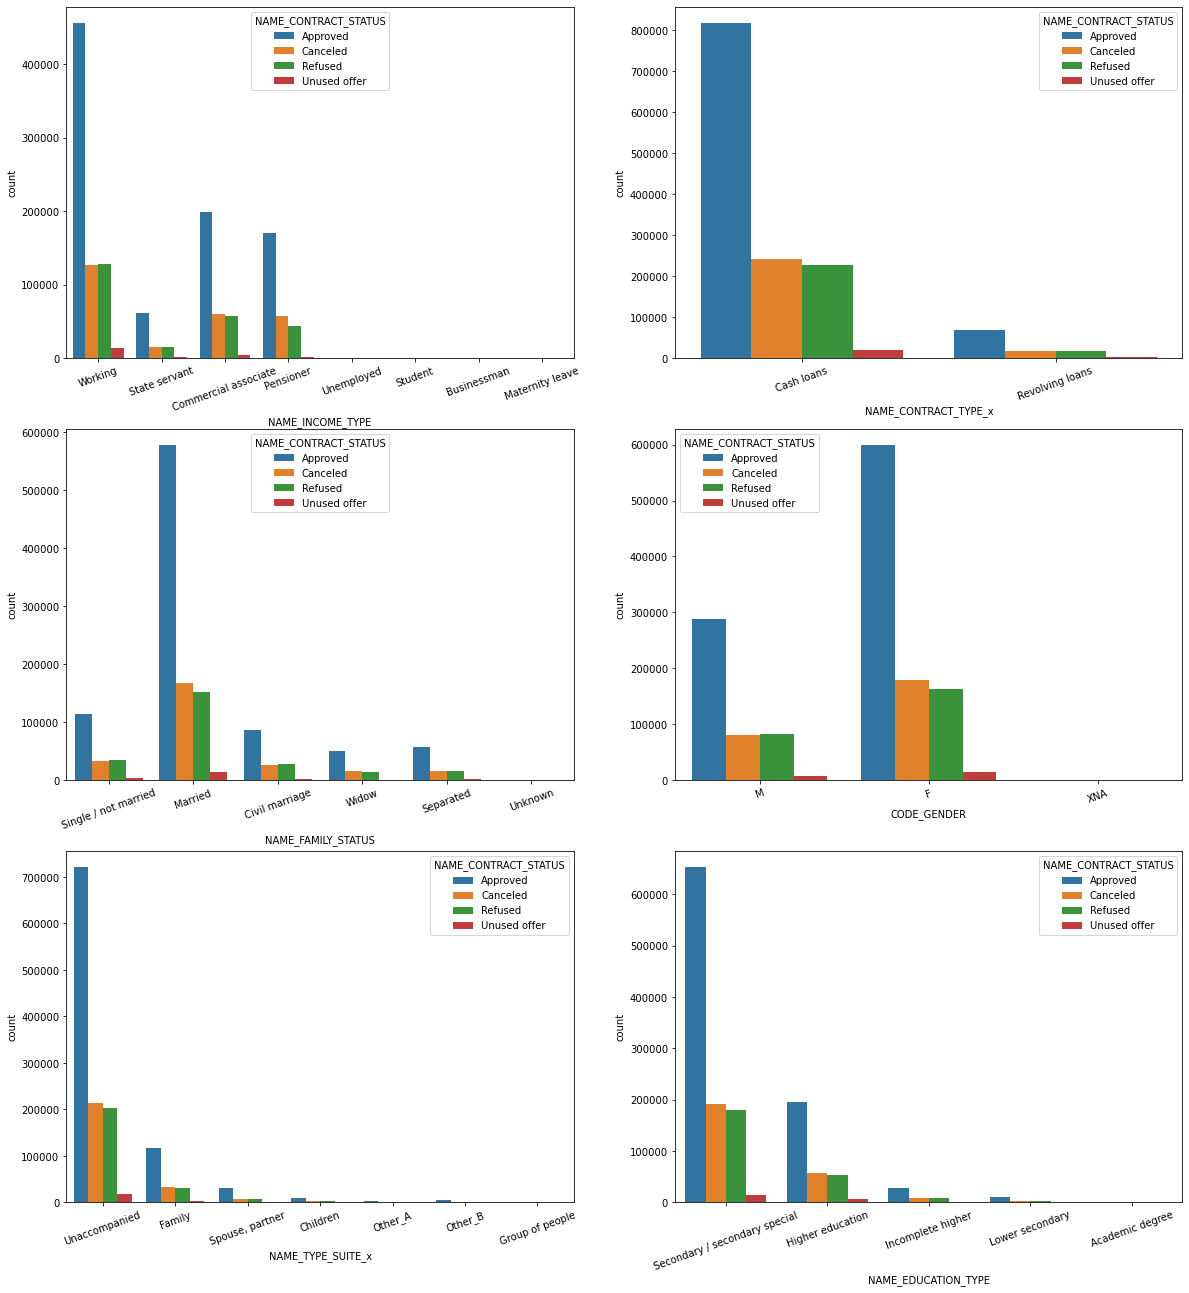

In [343]:
#categorical variable
plt.figure(figsize = (20,22))

plt.subplot(3,2,1)
sns.countplot(x = 'NAME_INCOME_TYPE', hue = 'NAME_CONTRACT_STATUS', data = final)
plt.xticks(rotation = 20)

plt.subplot(3,2,2)
sns.countplot(x = 'NAME_CONTRACT_TYPE_x', hue = 'NAME_CONTRACT_STATUS', data = final)
plt.xticks(rotation = 20)

plt.subplot(3,2,3)
sns.countplot(x = 'NAME_FAMILY_STATUS', hue = 'NAME_CONTRACT_STATUS', data = final)
plt.xticks(rotation = 20)

plt.subplot(3,2,4)
sns.countplot(x = 'CODE_GENDER', hue = 'NAME_CONTRACT_STATUS', data = final)
plt.xticks(rotation = 20)

plt.subplot(3,2,5)
sns.countplot(x = 'NAME_TYPE_SUITE_x', hue = 'NAME_CONTRACT_STATUS', data = final)
plt.xticks(rotation = 20)


plt.subplot(3,2,6)
sns.countplot(x = 'NAME_EDUCATION_TYPE', hue = 'NAME_CONTRACT_STATUS', data = final)
plt.xticks(rotation = 20)


plt.show()

#### Insights
- Working people have highest number of loans approved.
- Cash loans were approved the most
- Married people have highest loan approved.
- Female got more approved loans
- people who came unaccompanied have more number of all approved, cancelled, refused and unused loans
- People with sexcondary/special education have higher number.


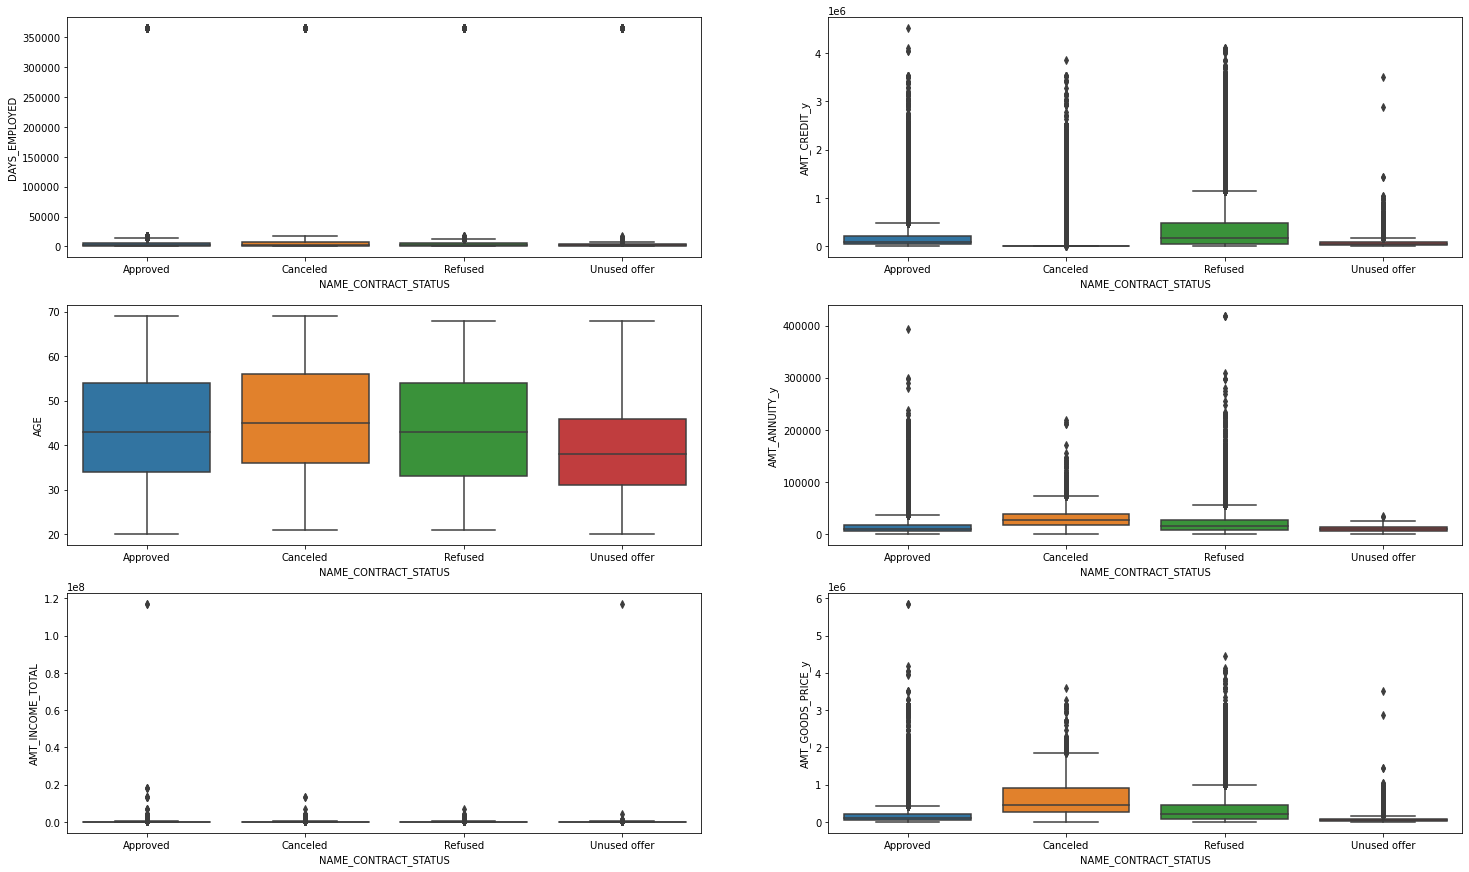

In [388]:
plt.figure(1,figsize=(25,15))

plt.subplot(3,2,1)
sns.boxplot(data=final,x="NAME_CONTRACT_STATUS",y="DAYS_EMPLOYED")
plt.subplot(3,2,2)
sns.boxplot(data=final,x="NAME_CONTRACT_STATUS",y="AMT_CREDIT_y")

plt.subplot(3,2,3)
sns.boxplot(data=final,x="NAME_CONTRACT_STATUS",y="AGE")

plt.subplot(3,2,4)
sns.boxplot(data=final,x="NAME_CONTRACT_STATUS",y="AMT_ANNUITY_y")

plt.subplot(3,2,5)

sns.boxplot(data=final,x="NAME_CONTRACT_STATUS",y="AMT_INCOME_TOTAL")

plt.subplot(3,2,6)
sns.boxplot(data=final,x="NAME_CONTRACT_STATUS",y="AMT_GOODS_PRICE_y")

plt.show()

#### Insights
- Higher goods price have more cancelled 
- Distrubution is almost same for all the plot, but for gender, unused offer has a lower cap 

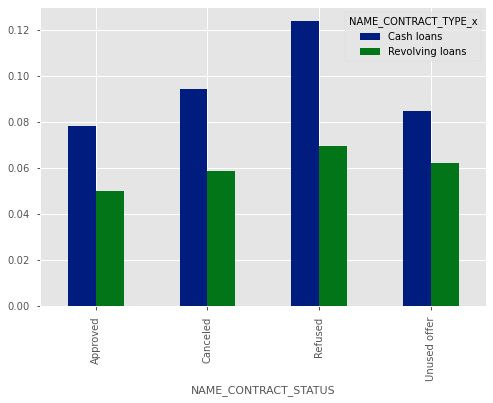

In [410]:
res = pd.pivot_table(data=final,index="NAME_CONTRACT_STATUS",columns="NAME_CONTRACT_TYPE_x",values="TARGET")
plt.style.use('seaborn-dark-palette')
res.plot.bar()
plt.show()

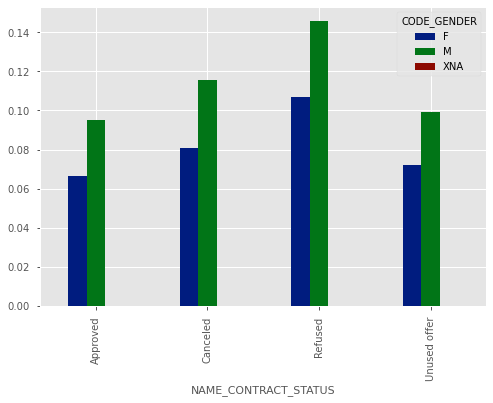

In [411]:
res = pd.pivot_table(data=final,index="NAME_CONTRACT_STATUS",columns="CODE_GENDER",values="TARGET")
plt.style.use('seaborn-dark-palette')
res.plot.bar()
plt.show()

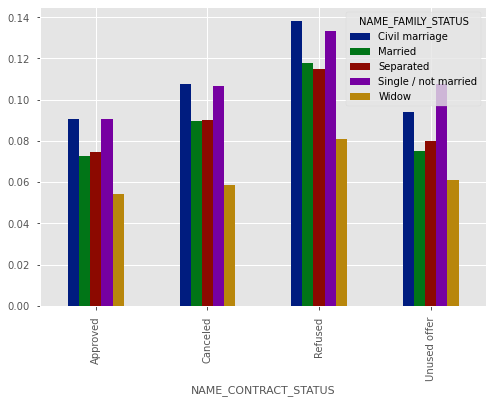

In [412]:
res = pd.pivot_table(data=final,index="NAME_CONTRACT_STATUS",columns="NAME_FAMILY_STATUS",values="TARGET")
plt.style.use('seaborn-dark-palette')
res.plot.bar()
plt.show()

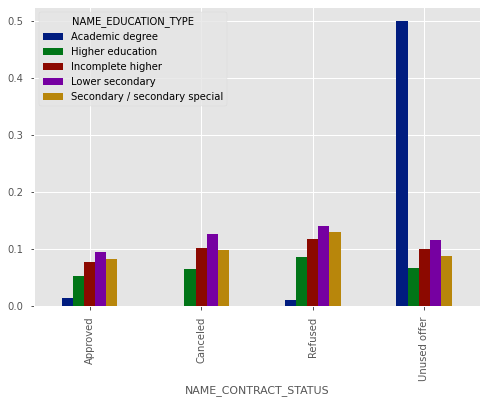

In [413]:
res = pd.pivot_table(data=final,index="NAME_CONTRACT_STATUS",columns="NAME_EDUCATION_TYPE",values="TARGET")
plt.style.use('seaborn-dark-palette')
res.plot.bar()
plt.show()

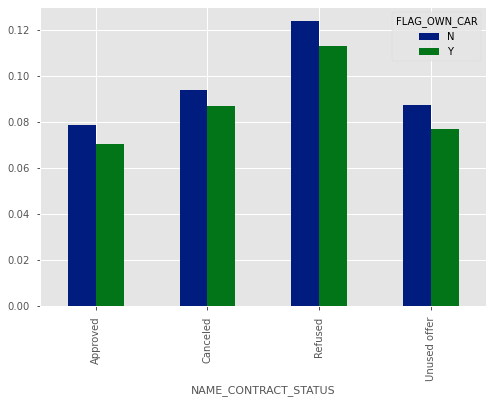

In [414]:
res = pd.pivot_table(data=final,index="NAME_CONTRACT_STATUS",columns="FLAG_OWN_CAR",values="TARGET")
plt.style.use('seaborn-dark-palette')
res.plot.bar()
plt.show()

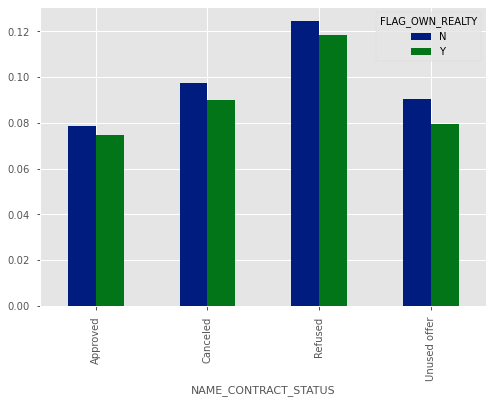

In [415]:
res = pd.pivot_table(data=final,index="NAME_CONTRACT_STATUS",columns="FLAG_OWN_REALTY",values="TARGET")
plt.style.use('seaborn-dark-palette')
res.plot.bar()
plt.show()

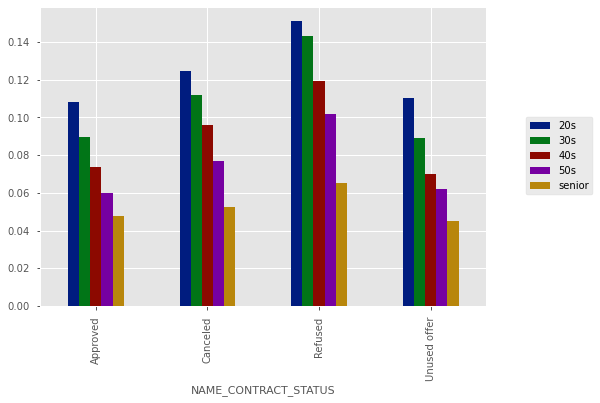

In [416]:
final['AGE_GROUP'] = pd.cut(final['AGE'], [0,19,29,39,49,59,150], labels = ['teens', '20s', '30s','40s', '50s', 'senior'])

res = pd.pivot_table(data=final,index="NAME_CONTRACT_STATUS",columns="AGE_GROUP",values="TARGET")
plt.style.use('seaborn-dark-palette')
res.plot.bar()
plt.legend(bbox_to_anchor = (1.25, 0.65))
plt.show()

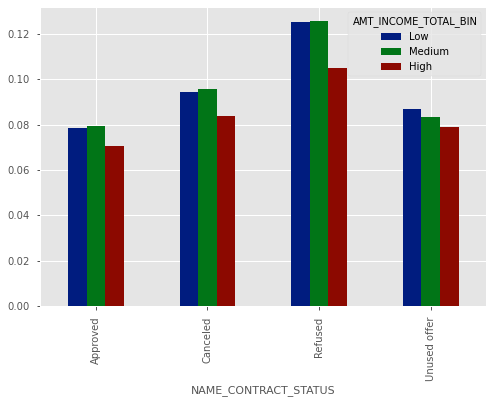

In [417]:
res = pd.pivot_table(data=final,index="NAME_CONTRACT_STATUS",columns="AMT_INCOME_TOTAL_BIN",values="TARGET")
plt.style.use('seaborn-dark-palette')
res.plot.bar()
plt.show()

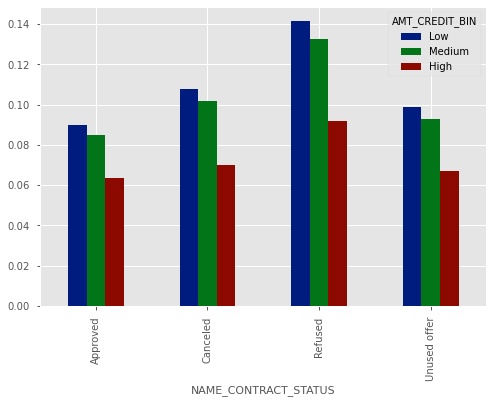

In [418]:
res = pd.pivot_table(data=final,index="NAME_CONTRACT_STATUS",columns="AMT_CREDIT_BIN",values="TARGET")
plt.style.use('seaborn-dark-palette')
res.plot.bar()
plt.show()

### Insights
- people with cash loans have more difficulty in payment of loan.
- Cash loans are also Refused more, so revolving loans are much better option for bank.
- Male clients have more difficulty in paying loans, females are at less risk.
- Widows have less defaults payments, single and civil married are higher risk candidates.
- clients with academic degree and have unused offer have more defaults.
- Owning a car or a home does not effect much , because both have defaulted, people who doesn't own one have a little higher risk.
- people in there 20s and 30s are more at risk, senior citizens on the other hand are at least.
- Low amount loans are at risk for people who have previously been refused.

# Conclusion
The factors that most affects the loan approvals are:

- Gender - Females are more likely to pay the installments and default less and should be considered to give loans
- Previously refused loans - Applicants who were refused loans previously should be avoided since they default more.
- Loan amount - Loans for lower amount between 270000-513531 is much risker range and sould be avoided, higher range are more likely options.
- Education- Applicants who completed education till lower secondary should be avoided.
- Applicant's age - People in there 20s should be avoided and senior citizens can be preffered more.
- Applicant's family status - Widows should be preferred rather then single and civil married folks.
- Contract type - Revolving loans are much better option then cash loans.

